In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import cross_val_score, cross_validate
from transliterate import translit, get_available_language_codes
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import pickle 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

/Users/rvtsukanov/utils/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
data = pd.read_csv('../DATA/01_MAG/first.csv', index_col=None).drop(columns=['Unnamed: 0'])
target = pd.read_csv('../DATA/01_MAG/first_targets.csv', index_col=None, names=['magnetic_loss']).reset_index().drop(columns=['index'])['magnetic_loss']
data = data.drop(target[target.isna()].index)
target = target.dropna()

In [3]:
transliteration_mapping = {col: translit(col, 'ru', reversed=True) for col in data.columns}
transliteration_mapping_inverse = {val: key for key, val in transliteration_mapping.items()}
data.columns = transliteration_mapping_inverse.keys()

In [4]:
import seaborn as sns 

In [5]:
#Prepare targets
#CLASSIFICATION
y_clf = pd.cut(target, [-np.inf, 1.05, 1.26, np.inf], labels=[0, 1, 2])

#REGRESSION
y_reg = target


#BIMODAL CLF
y_bimod = pd.cut(target, [-np.inf, 1.19, np.inf], labels=[0, 1])

### Stage: classifier (3)

###### GBDT

In [6]:
estimator_clf = lgb.LGBMClassifier()

##### Recover knowledge about multilabel classification!!!!

In [56]:
gcv = GridSearchCV(estimator=estimator, param_grid={'num_leaves': [i for i in range(5, 41, 5)],
                                                    'reg_alpha': [i * 0.1 for i in range(0, 11)],
                                                    'reg_lambda': [i * 0.1 for i in range(0, 11)]},
                   verbose=10, cv=StratifiedKFold(n_splits=4, shuffle=True), scoring='f1_macro')

In [57]:
gcv.fit(X=data, y=y_clf)

Fitting 4 folds for each of 968 candidates, totalling 3872 fits
[CV] num_leaves=5, reg_alpha=0.0, reg_lambda=0.0 .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  num_leaves=5, reg_alpha=0.0, reg_lambda=0.0, score=0.805, total=   0.9s
[CV] num_leaves=5, reg_alpha=0.0, reg_lambda=0.0 .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  num_leaves=5, reg_alpha=0.0, reg_lambda=0.0, score=0.811, total=   0.9s
[CV] num_leaves=5, reg_alpha=0.0, reg_lambda=0.0 .....................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV]  num_leaves=5, reg_alpha=0.0, reg_lambda=0.0, score=0.810, total=   1.0s
[CV] num_leaves=5, reg_alpha=0.0, reg_lambda=0.0 .....................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s remaining:    0.0s


[CV]  num_leaves=5, reg_alpha=0.0, reg_lambda=0.0, score=0.812, total=   0.9s
[CV] num_leaves=5, reg_alpha=0.0, reg_lambda=0.1 .....................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s remaining:    0.0s


[CV]  num_leaves=5, reg_alpha=0.0, reg_lambda=0.1, score=0.804, total=   1.0s
[CV] num_leaves=5, reg_alpha=0.0, reg_lambda=0.1 .....................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.7s remaining:    0.0s


[CV]  num_leaves=5, reg_alpha=0.0, reg_lambda=0.1, score=0.812, total=   0.9s
[CV] num_leaves=5, reg_alpha=0.0, reg_lambda=0.1 .....................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.6s remaining:    0.0s


[CV]  num_leaves=5, reg_alpha=0.0, reg_lambda=0.1, score=0.810, total=   0.9s
[CV] num_leaves=5, reg_alpha=0.0, reg_lambda=0.1 .....................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.6s remaining:    0.0s


[CV]  num_leaves=5, reg_alpha=0.0, reg_lambda=0.1, score=0.812, total=   0.9s
[CV] num_leaves=5, reg_alpha=0.0, reg_lambda=0.2 .....................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.5s remaining:    0.0s


[CV]  num_leaves=5, reg_alpha=0.0, reg_lambda=0.2, score=0.805, total=   1.0s
[CV] num_leaves=5, reg_alpha=0.0, reg_lambda=0.2 .....................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.5s remaining:    0.0s


[CV]  num_leaves=5, reg_alpha=0.0, reg_lambda=0.2, score=0.811, total=   1.1s
[CV] num_leaves=5, reg_alpha=0.0, reg_lambda=0.2 .....................
[CV]  num_leaves=5, reg_alpha=0.0, reg_lambda=0.2, score=0.810, total=   1.0s
[CV] num_leaves=5, reg_alpha=0.0, reg_lambda=0.2 .....................
[CV]  num_leaves=5, reg_alpha=0.0, reg_lambda=0.2, score=0.813, total=   1.0s
[CV] num_leaves=5, reg_alpha=0.0, reg_lambda=0.30000000000000004 .....
[CV]  num_leaves=5, reg_alpha=0.0, reg_lambda=0.30000000000000004, score=0.803, total=   1.0s
[CV] num_leaves=5, reg_alpha=0.0, reg_lambda=0.30000000000000004 .....
[CV]  num_leaves=5, reg_alpha=0.0, reg_lambda=0.30000000000000004, score=0.813, total=   1.0s
[CV] num_leaves=5, reg_alpha=0.0, reg_lambda=0.30000000000000004 .....
[CV]  num_leaves=5, reg_alpha=0.0, reg_lambda=0.30000000000000004, score=0.812, total=   1.0s
[CV] num_leaves=5, reg_alpha=0.0, reg_lambda=0.30000000000000004 .....
[CV]  num_leaves=5, reg_alpha=0.0, reg_lambda=0.3000000000

[CV]  num_leaves=5, reg_alpha=0.1, reg_lambda=0.4, score=0.811, total=   1.1s
[CV] num_leaves=5, reg_alpha=0.1, reg_lambda=0.5 .....................
[CV]  num_leaves=5, reg_alpha=0.1, reg_lambda=0.5, score=0.805, total=   1.1s
[CV] num_leaves=5, reg_alpha=0.1, reg_lambda=0.5 .....................
[CV]  num_leaves=5, reg_alpha=0.1, reg_lambda=0.5, score=0.811, total=   1.1s
[CV] num_leaves=5, reg_alpha=0.1, reg_lambda=0.5 .....................
[CV]  num_leaves=5, reg_alpha=0.1, reg_lambda=0.5, score=0.812, total=   1.1s
[CV] num_leaves=5, reg_alpha=0.1, reg_lambda=0.5 .....................
[CV]  num_leaves=5, reg_alpha=0.1, reg_lambda=0.5, score=0.812, total=   1.1s
[CV] num_leaves=5, reg_alpha=0.1, reg_lambda=0.6000000000000001 ......
[CV]  num_leaves=5, reg_alpha=0.1, reg_lambda=0.6000000000000001, score=0.804, total=   1.1s
[CV] num_leaves=5, reg_alpha=0.1, reg_lambda=0.6000000000000001 ......
[CV]  num_leaves=5, reg_alpha=0.1, reg_lambda=0.6000000000000001, score=0.809, total=   1.1

[CV]  num_leaves=5, reg_alpha=0.2, reg_lambda=0.7000000000000001, score=0.812, total=   1.6s
[CV] num_leaves=5, reg_alpha=0.2, reg_lambda=0.7000000000000001 ......
[CV]  num_leaves=5, reg_alpha=0.2, reg_lambda=0.7000000000000001, score=0.813, total=   1.8s
[CV] num_leaves=5, reg_alpha=0.2, reg_lambda=0.7000000000000001 ......
[CV]  num_leaves=5, reg_alpha=0.2, reg_lambda=0.7000000000000001, score=0.812, total=   2.0s
[CV] num_leaves=5, reg_alpha=0.2, reg_lambda=0.8 .....................
[CV]  num_leaves=5, reg_alpha=0.2, reg_lambda=0.8, score=0.805, total=   1.7s
[CV] num_leaves=5, reg_alpha=0.2, reg_lambda=0.8 .....................
[CV]  num_leaves=5, reg_alpha=0.2, reg_lambda=0.8, score=0.812, total=   1.8s
[CV] num_leaves=5, reg_alpha=0.2, reg_lambda=0.8 .....................
[CV]  num_leaves=5, reg_alpha=0.2, reg_lambda=0.8, score=0.811, total=   2.3s
[CV] num_leaves=5, reg_alpha=0.2, reg_lambda=0.8 .....................
[CV]  num_leaves=5, reg_alpha=0.2, reg_lambda=0.8, score=0.81

[CV]  num_leaves=5, reg_alpha=0.30000000000000004, reg_lambda=0.8, score=0.812, total=   1.6s
[CV] num_leaves=5, reg_alpha=0.30000000000000004, reg_lambda=0.8 .....
[CV]  num_leaves=5, reg_alpha=0.30000000000000004, reg_lambda=0.8, score=0.811, total=   1.9s
[CV] num_leaves=5, reg_alpha=0.30000000000000004, reg_lambda=0.9 .....
[CV]  num_leaves=5, reg_alpha=0.30000000000000004, reg_lambda=0.9, score=0.804, total=   1.8s
[CV] num_leaves=5, reg_alpha=0.30000000000000004, reg_lambda=0.9 .....
[CV]  num_leaves=5, reg_alpha=0.30000000000000004, reg_lambda=0.9, score=0.811, total=   2.0s
[CV] num_leaves=5, reg_alpha=0.30000000000000004, reg_lambda=0.9 .....
[CV]  num_leaves=5, reg_alpha=0.30000000000000004, reg_lambda=0.9, score=0.811, total=   1.9s
[CV] num_leaves=5, reg_alpha=0.30000000000000004, reg_lambda=0.9 .....
[CV]  num_leaves=5, reg_alpha=0.30000000000000004, reg_lambda=0.9, score=0.813, total=   1.9s
[CV] num_leaves=5, reg_alpha=0.30000000000000004, reg_lambda=1.0 .....
[CV]  num_

[CV]  num_leaves=5, reg_alpha=0.4, reg_lambda=1.0, score=0.811, total=   1.8s
[CV] num_leaves=5, reg_alpha=0.5, reg_lambda=0.0 .....................
[CV]  num_leaves=5, reg_alpha=0.5, reg_lambda=0.0, score=0.804, total=   2.1s
[CV] num_leaves=5, reg_alpha=0.5, reg_lambda=0.0 .....................
[CV]  num_leaves=5, reg_alpha=0.5, reg_lambda=0.0, score=0.811, total=   2.1s
[CV] num_leaves=5, reg_alpha=0.5, reg_lambda=0.0 .....................
[CV]  num_leaves=5, reg_alpha=0.5, reg_lambda=0.0, score=0.810, total=   2.2s
[CV] num_leaves=5, reg_alpha=0.5, reg_lambda=0.0 .....................
[CV]  num_leaves=5, reg_alpha=0.5, reg_lambda=0.0, score=0.811, total=   1.8s
[CV] num_leaves=5, reg_alpha=0.5, reg_lambda=0.1 .....................
[CV]  num_leaves=5, reg_alpha=0.5, reg_lambda=0.1, score=0.805, total=   2.1s
[CV] num_leaves=5, reg_alpha=0.5, reg_lambda=0.1 .....................
[CV]  num_leaves=5, reg_alpha=0.5, reg_lambda=0.1, score=0.811, total=   2.5s
[CV] num_leaves=5, reg_alpha

[CV]  num_leaves=5, reg_alpha=0.6000000000000001, reg_lambda=0.2, score=0.805, total=   1.3s
[CV] num_leaves=5, reg_alpha=0.6000000000000001, reg_lambda=0.2 ......
[CV]  num_leaves=5, reg_alpha=0.6000000000000001, reg_lambda=0.2, score=0.812, total=   1.3s
[CV] num_leaves=5, reg_alpha=0.6000000000000001, reg_lambda=0.2 ......
[CV]  num_leaves=5, reg_alpha=0.6000000000000001, reg_lambda=0.2, score=0.811, total=   1.4s
[CV] num_leaves=5, reg_alpha=0.6000000000000001, reg_lambda=0.2 ......
[CV]  num_leaves=5, reg_alpha=0.6000000000000001, reg_lambda=0.2, score=0.813, total=   1.3s
[CV] num_leaves=5, reg_alpha=0.6000000000000001, reg_lambda=0.30000000000000004 
[CV]  num_leaves=5, reg_alpha=0.6000000000000001, reg_lambda=0.30000000000000004, score=0.804, total=   1.3s
[CV] num_leaves=5, reg_alpha=0.6000000000000001, reg_lambda=0.30000000000000004 
[CV]  num_leaves=5, reg_alpha=0.6000000000000001, reg_lambda=0.30000000000000004, score=0.812, total=   1.3s
[CV] num_leaves=5, reg_alpha=0.6000

[CV]  num_leaves=5, reg_alpha=0.7000000000000001, reg_lambda=0.30000000000000004, score=0.810, total=   1.5s
[CV] num_leaves=5, reg_alpha=0.7000000000000001, reg_lambda=0.30000000000000004 
[CV]  num_leaves=5, reg_alpha=0.7000000000000001, reg_lambda=0.30000000000000004, score=0.810, total=   1.5s
[CV] num_leaves=5, reg_alpha=0.7000000000000001, reg_lambda=0.30000000000000004 
[CV]  num_leaves=5, reg_alpha=0.7000000000000001, reg_lambda=0.30000000000000004, score=0.811, total=   1.6s
[CV] num_leaves=5, reg_alpha=0.7000000000000001, reg_lambda=0.4 ......
[CV]  num_leaves=5, reg_alpha=0.7000000000000001, reg_lambda=0.4, score=0.803, total=   1.7s
[CV] num_leaves=5, reg_alpha=0.7000000000000001, reg_lambda=0.4 ......
[CV]  num_leaves=5, reg_alpha=0.7000000000000001, reg_lambda=0.4, score=0.812, total=   1.6s
[CV] num_leaves=5, reg_alpha=0.7000000000000001, reg_lambda=0.4 ......
[CV]  num_leaves=5, reg_alpha=0.7000000000000001, reg_lambda=0.4, score=0.811, total=   1.8s
[CV] num_leaves=5, 

[CV]  num_leaves=5, reg_alpha=0.8, reg_lambda=0.4, score=0.813, total=   1.7s
[CV] num_leaves=5, reg_alpha=0.8, reg_lambda=0.5 .....................
[CV]  num_leaves=5, reg_alpha=0.8, reg_lambda=0.5, score=0.804, total=   1.6s
[CV] num_leaves=5, reg_alpha=0.8, reg_lambda=0.5 .....................
[CV]  num_leaves=5, reg_alpha=0.8, reg_lambda=0.5, score=0.811, total=   1.6s
[CV] num_leaves=5, reg_alpha=0.8, reg_lambda=0.5 .....................
[CV]  num_leaves=5, reg_alpha=0.8, reg_lambda=0.5, score=0.810, total=   2.2s
[CV] num_leaves=5, reg_alpha=0.8, reg_lambda=0.5 .....................
[CV]  num_leaves=5, reg_alpha=0.8, reg_lambda=0.5, score=0.813, total=   2.1s
[CV] num_leaves=5, reg_alpha=0.8, reg_lambda=0.6000000000000001 ......
[CV]  num_leaves=5, reg_alpha=0.8, reg_lambda=0.6000000000000001, score=0.803, total=   1.9s
[CV] num_leaves=5, reg_alpha=0.8, reg_lambda=0.6000000000000001 ......
[CV]  num_leaves=5, reg_alpha=0.8, reg_lambda=0.6000000000000001, score=0.811, total=   2.4

[CV]  num_leaves=5, reg_alpha=0.9, reg_lambda=0.7000000000000001, score=0.811, total=   2.0s
[CV] num_leaves=5, reg_alpha=0.9, reg_lambda=0.7000000000000001 ......
[CV]  num_leaves=5, reg_alpha=0.9, reg_lambda=0.7000000000000001, score=0.811, total=   2.0s
[CV] num_leaves=5, reg_alpha=0.9, reg_lambda=0.7000000000000001 ......
[CV]  num_leaves=5, reg_alpha=0.9, reg_lambda=0.7000000000000001, score=0.814, total=   1.7s
[CV] num_leaves=5, reg_alpha=0.9, reg_lambda=0.8 .....................
[CV]  num_leaves=5, reg_alpha=0.9, reg_lambda=0.8, score=0.804, total=   1.7s
[CV] num_leaves=5, reg_alpha=0.9, reg_lambda=0.8 .....................
[CV]  num_leaves=5, reg_alpha=0.9, reg_lambda=0.8, score=0.812, total=   1.7s
[CV] num_leaves=5, reg_alpha=0.9, reg_lambda=0.8 .....................
[CV]  num_leaves=5, reg_alpha=0.9, reg_lambda=0.8, score=0.813, total=   1.8s
[CV] num_leaves=5, reg_alpha=0.9, reg_lambda=0.8 .....................
[CV]  num_leaves=5, reg_alpha=0.9, reg_lambda=0.8, score=0.81

[CV]  num_leaves=5, reg_alpha=1.0, reg_lambda=0.9, score=0.814, total=   1.6s
[CV] num_leaves=5, reg_alpha=1.0, reg_lambda=1.0 .....................
[CV]  num_leaves=5, reg_alpha=1.0, reg_lambda=1.0, score=0.804, total=   1.5s
[CV] num_leaves=5, reg_alpha=1.0, reg_lambda=1.0 .....................
[CV]  num_leaves=5, reg_alpha=1.0, reg_lambda=1.0, score=0.811, total=   1.8s
[CV] num_leaves=5, reg_alpha=1.0, reg_lambda=1.0 .....................
[CV]  num_leaves=5, reg_alpha=1.0, reg_lambda=1.0, score=0.811, total=   2.5s
[CV] num_leaves=5, reg_alpha=1.0, reg_lambda=1.0 .....................
[CV]  num_leaves=5, reg_alpha=1.0, reg_lambda=1.0, score=0.813, total=   2.3s
[CV] num_leaves=10, reg_alpha=0.0, reg_lambda=0.0 ....................
[CV]  num_leaves=10, reg_alpha=0.0, reg_lambda=0.0, score=0.825, total=   2.4s
[CV] num_leaves=10, reg_alpha=0.0, reg_lambda=0.0 ....................
[CV]  num_leaves=10, reg_alpha=0.0, reg_lambda=0.0, score=0.838, total=   2.4s
[CV] num_leaves=10, reg_al

[CV]  num_leaves=10, reg_alpha=0.1, reg_lambda=0.1, score=0.837, total=   2.0s
[CV] num_leaves=10, reg_alpha=0.1, reg_lambda=0.1 ....................
[CV]  num_leaves=10, reg_alpha=0.1, reg_lambda=0.1, score=0.837, total=   4.3s
[CV] num_leaves=10, reg_alpha=0.1, reg_lambda=0.1 ....................
[CV]  num_leaves=10, reg_alpha=0.1, reg_lambda=0.1, score=0.838, total=   4.7s
[CV] num_leaves=10, reg_alpha=0.1, reg_lambda=0.2 ....................
[CV]  num_leaves=10, reg_alpha=0.1, reg_lambda=0.2, score=0.825, total=   4.6s
[CV] num_leaves=10, reg_alpha=0.1, reg_lambda=0.2 ....................
[CV]  num_leaves=10, reg_alpha=0.1, reg_lambda=0.2, score=0.838, total=   4.5s
[CV] num_leaves=10, reg_alpha=0.1, reg_lambda=0.2 ....................
[CV]  num_leaves=10, reg_alpha=0.1, reg_lambda=0.2, score=0.837, total=   4.3s
[CV] num_leaves=10, reg_alpha=0.1, reg_lambda=0.2 ....................
[CV]  num_leaves=10, reg_alpha=0.1, reg_lambda=0.2, score=0.834, total=   4.6s
[CV] num_leaves=10, r

[CV]  num_leaves=10, reg_alpha=0.2, reg_lambda=0.30000000000000004, score=0.839, total=   2.1s
[CV] num_leaves=10, reg_alpha=0.2, reg_lambda=0.4 ....................
[CV]  num_leaves=10, reg_alpha=0.2, reg_lambda=0.4, score=0.824, total=   2.3s
[CV] num_leaves=10, reg_alpha=0.2, reg_lambda=0.4 ....................
[CV]  num_leaves=10, reg_alpha=0.2, reg_lambda=0.4, score=0.839, total=   2.4s
[CV] num_leaves=10, reg_alpha=0.2, reg_lambda=0.4 ....................
[CV]  num_leaves=10, reg_alpha=0.2, reg_lambda=0.4, score=0.836, total=   2.1s
[CV] num_leaves=10, reg_alpha=0.2, reg_lambda=0.4 ....................
[CV]  num_leaves=10, reg_alpha=0.2, reg_lambda=0.4, score=0.834, total=   2.2s
[CV] num_leaves=10, reg_alpha=0.2, reg_lambda=0.5 ....................
[CV]  num_leaves=10, reg_alpha=0.2, reg_lambda=0.5, score=0.825, total=   1.9s
[CV] num_leaves=10, reg_alpha=0.2, reg_lambda=0.5 ....................
[CV]  num_leaves=10, reg_alpha=0.2, reg_lambda=0.5, score=0.838, total=   1.9s
[CV] 

[CV]  num_leaves=10, reg_alpha=0.30000000000000004, reg_lambda=0.5, score=0.837, total=   2.2s
[CV] num_leaves=10, reg_alpha=0.30000000000000004, reg_lambda=0.5 ....
[CV]  num_leaves=10, reg_alpha=0.30000000000000004, reg_lambda=0.5, score=0.836, total=   1.9s
[CV] num_leaves=10, reg_alpha=0.30000000000000004, reg_lambda=0.6000000000000001 
[CV]  num_leaves=10, reg_alpha=0.30000000000000004, reg_lambda=0.6000000000000001, score=0.824, total=   1.9s
[CV] num_leaves=10, reg_alpha=0.30000000000000004, reg_lambda=0.6000000000000001 
[CV]  num_leaves=10, reg_alpha=0.30000000000000004, reg_lambda=0.6000000000000001, score=0.837, total=   1.9s
[CV] num_leaves=10, reg_alpha=0.30000000000000004, reg_lambda=0.6000000000000001 
[CV]  num_leaves=10, reg_alpha=0.30000000000000004, reg_lambda=0.6000000000000001, score=0.836, total=   2.0s
[CV] num_leaves=10, reg_alpha=0.30000000000000004, reg_lambda=0.6000000000000001 
[CV]  num_leaves=10, reg_alpha=0.30000000000000004, reg_lambda=0.6000000000000001

[CV]  num_leaves=10, reg_alpha=0.4, reg_lambda=0.7000000000000001, score=0.836, total=   1.7s
[CV] num_leaves=10, reg_alpha=0.4, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=10, reg_alpha=0.4, reg_lambda=0.7000000000000001, score=0.836, total=   1.7s
[CV] num_leaves=10, reg_alpha=0.4, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=10, reg_alpha=0.4, reg_lambda=0.7000000000000001, score=0.835, total=   1.7s
[CV] num_leaves=10, reg_alpha=0.4, reg_lambda=0.8 ....................
[CV]  num_leaves=10, reg_alpha=0.4, reg_lambda=0.8, score=0.825, total=   1.7s
[CV] num_leaves=10, reg_alpha=0.4, reg_lambda=0.8 ....................
[CV]  num_leaves=10, reg_alpha=0.4, reg_lambda=0.8, score=0.836, total=   1.7s
[CV] num_leaves=10, reg_alpha=0.4, reg_lambda=0.8 ....................
[CV]  num_leaves=10, reg_alpha=0.4, reg_lambda=0.8, score=0.836, total=   1.9s
[CV] num_leaves=10, reg_alpha=0.4, reg_lambda=0.8 ....................
[CV]  num_leaves=10, reg_alpha=0.4, reg_lambda=0.8, sco

[CV]  num_leaves=10, reg_alpha=0.5, reg_lambda=0.9, score=0.836, total=   1.8s
[CV] num_leaves=10, reg_alpha=0.5, reg_lambda=1.0 ....................
[CV]  num_leaves=10, reg_alpha=0.5, reg_lambda=1.0, score=0.823, total=   1.8s
[CV] num_leaves=10, reg_alpha=0.5, reg_lambda=1.0 ....................
[CV]  num_leaves=10, reg_alpha=0.5, reg_lambda=1.0, score=0.835, total=   1.7s
[CV] num_leaves=10, reg_alpha=0.5, reg_lambda=1.0 ....................
[CV]  num_leaves=10, reg_alpha=0.5, reg_lambda=1.0, score=0.836, total=   1.8s
[CV] num_leaves=10, reg_alpha=0.5, reg_lambda=1.0 ....................
[CV]  num_leaves=10, reg_alpha=0.5, reg_lambda=1.0, score=0.839, total=   1.7s
[CV] num_leaves=10, reg_alpha=0.6000000000000001, reg_lambda=0.0 .....
[CV]  num_leaves=10, reg_alpha=0.6000000000000001, reg_lambda=0.0, score=0.826, total=   1.7s
[CV] num_leaves=10, reg_alpha=0.6000000000000001, reg_lambda=0.0 .....
[CV]  num_leaves=10, reg_alpha=0.6000000000000001, reg_lambda=0.0, score=0.836, total

[CV]  num_leaves=10, reg_alpha=0.7000000000000001, reg_lambda=0.0, score=0.823, total=   3.1s
[CV] num_leaves=10, reg_alpha=0.7000000000000001, reg_lambda=0.0 .....
[CV]  num_leaves=10, reg_alpha=0.7000000000000001, reg_lambda=0.0, score=0.839, total=   3.3s
[CV] num_leaves=10, reg_alpha=0.7000000000000001, reg_lambda=0.0 .....
[CV]  num_leaves=10, reg_alpha=0.7000000000000001, reg_lambda=0.0, score=0.835, total=   3.4s
[CV] num_leaves=10, reg_alpha=0.7000000000000001, reg_lambda=0.0 .....
[CV]  num_leaves=10, reg_alpha=0.7000000000000001, reg_lambda=0.0, score=0.837, total=   3.3s
[CV] num_leaves=10, reg_alpha=0.7000000000000001, reg_lambda=0.1 .....
[CV]  num_leaves=10, reg_alpha=0.7000000000000001, reg_lambda=0.1, score=0.826, total=   3.6s
[CV] num_leaves=10, reg_alpha=0.7000000000000001, reg_lambda=0.1 .....
[CV]  num_leaves=10, reg_alpha=0.7000000000000001, reg_lambda=0.1, score=0.837, total=   3.9s
[CV] num_leaves=10, reg_alpha=0.7000000000000001, reg_lambda=0.1 .....
[CV]  num_

[CV]  num_leaves=10, reg_alpha=0.8, reg_lambda=0.1, score=0.835, total=   3.1s
[CV] num_leaves=10, reg_alpha=0.8, reg_lambda=0.1 ....................
[CV]  num_leaves=10, reg_alpha=0.8, reg_lambda=0.1, score=0.837, total=   3.2s
[CV] num_leaves=10, reg_alpha=0.8, reg_lambda=0.1 ....................
[CV]  num_leaves=10, reg_alpha=0.8, reg_lambda=0.1, score=0.836, total=   3.1s
[CV] num_leaves=10, reg_alpha=0.8, reg_lambda=0.2 ....................
[CV]  num_leaves=10, reg_alpha=0.8, reg_lambda=0.2, score=0.824, total=   3.3s
[CV] num_leaves=10, reg_alpha=0.8, reg_lambda=0.2 ....................
[CV]  num_leaves=10, reg_alpha=0.8, reg_lambda=0.2, score=0.837, total=   3.1s
[CV] num_leaves=10, reg_alpha=0.8, reg_lambda=0.2 ....................
[CV]  num_leaves=10, reg_alpha=0.8, reg_lambda=0.2, score=0.837, total=   3.1s
[CV] num_leaves=10, reg_alpha=0.8, reg_lambda=0.2 ....................
[CV]  num_leaves=10, reg_alpha=0.8, reg_lambda=0.2, score=0.835, total=   3.2s
[CV] num_leaves=10, r

[CV]  num_leaves=10, reg_alpha=0.9, reg_lambda=0.30000000000000004, score=0.835, total=   1.7s
[CV] num_leaves=10, reg_alpha=0.9, reg_lambda=0.4 ....................
[CV]  num_leaves=10, reg_alpha=0.9, reg_lambda=0.4, score=0.826, total=   1.7s
[CV] num_leaves=10, reg_alpha=0.9, reg_lambda=0.4 ....................
[CV]  num_leaves=10, reg_alpha=0.9, reg_lambda=0.4, score=0.838, total=   1.7s
[CV] num_leaves=10, reg_alpha=0.9, reg_lambda=0.4 ....................
[CV]  num_leaves=10, reg_alpha=0.9, reg_lambda=0.4, score=0.837, total=   1.7s
[CV] num_leaves=10, reg_alpha=0.9, reg_lambda=0.4 ....................
[CV]  num_leaves=10, reg_alpha=0.9, reg_lambda=0.4, score=0.835, total=   1.7s
[CV] num_leaves=10, reg_alpha=0.9, reg_lambda=0.5 ....................
[CV]  num_leaves=10, reg_alpha=0.9, reg_lambda=0.5, score=0.824, total=   1.7s
[CV] num_leaves=10, reg_alpha=0.9, reg_lambda=0.5 ....................
[CV]  num_leaves=10, reg_alpha=0.9, reg_lambda=0.5, score=0.834, total=   1.8s
[CV] 

[CV]  num_leaves=10, reg_alpha=1.0, reg_lambda=0.6000000000000001, score=0.835, total=   1.7s
[CV] num_leaves=10, reg_alpha=1.0, reg_lambda=0.6000000000000001 .....
[CV]  num_leaves=10, reg_alpha=1.0, reg_lambda=0.6000000000000001, score=0.836, total=   1.7s
[CV] num_leaves=10, reg_alpha=1.0, reg_lambda=0.6000000000000001 .....
[CV]  num_leaves=10, reg_alpha=1.0, reg_lambda=0.6000000000000001, score=0.835, total=   1.7s
[CV] num_leaves=10, reg_alpha=1.0, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=10, reg_alpha=1.0, reg_lambda=0.7000000000000001, score=0.823, total=   1.7s
[CV] num_leaves=10, reg_alpha=1.0, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=10, reg_alpha=1.0, reg_lambda=0.7000000000000001, score=0.838, total=   1.7s
[CV] num_leaves=10, reg_alpha=1.0, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=10, reg_alpha=1.0, reg_lambda=0.7000000000000001, score=0.837, total=   1.8s
[CV] num_leaves=10, reg_alpha=1.0, reg_lambda=0.7000000000000001 .....
[CV]  num_

[CV]  num_leaves=15, reg_alpha=0.0, reg_lambda=0.8, score=0.850, total=   2.0s
[CV] num_leaves=15, reg_alpha=0.0, reg_lambda=0.8 ....................
[CV]  num_leaves=15, reg_alpha=0.0, reg_lambda=0.8, score=0.849, total=   2.2s
[CV] num_leaves=15, reg_alpha=0.0, reg_lambda=0.9 ....................
[CV]  num_leaves=15, reg_alpha=0.0, reg_lambda=0.9, score=0.838, total=   2.0s
[CV] num_leaves=15, reg_alpha=0.0, reg_lambda=0.9 ....................
[CV]  num_leaves=15, reg_alpha=0.0, reg_lambda=0.9, score=0.852, total=   2.0s
[CV] num_leaves=15, reg_alpha=0.0, reg_lambda=0.9 ....................
[CV]  num_leaves=15, reg_alpha=0.0, reg_lambda=0.9, score=0.849, total=   2.2s
[CV] num_leaves=15, reg_alpha=0.0, reg_lambda=0.9 ....................
[CV]  num_leaves=15, reg_alpha=0.0, reg_lambda=0.9, score=0.849, total=   2.0s
[CV] num_leaves=15, reg_alpha=0.0, reg_lambda=1.0 ....................
[CV]  num_leaves=15, reg_alpha=0.0, reg_lambda=1.0, score=0.840, total=   2.0s
[CV] num_leaves=15, r

[CV]  num_leaves=15, reg_alpha=0.2, reg_lambda=0.0, score=0.841, total=   2.0s
[CV] num_leaves=15, reg_alpha=0.2, reg_lambda=0.0 ....................
[CV]  num_leaves=15, reg_alpha=0.2, reg_lambda=0.0, score=0.853, total=   2.0s
[CV] num_leaves=15, reg_alpha=0.2, reg_lambda=0.0 ....................
[CV]  num_leaves=15, reg_alpha=0.2, reg_lambda=0.0, score=0.849, total=   2.1s
[CV] num_leaves=15, reg_alpha=0.2, reg_lambda=0.0 ....................
[CV]  num_leaves=15, reg_alpha=0.2, reg_lambda=0.0, score=0.850, total=   2.0s
[CV] num_leaves=15, reg_alpha=0.2, reg_lambda=0.1 ....................
[CV]  num_leaves=15, reg_alpha=0.2, reg_lambda=0.1, score=0.838, total=   2.0s
[CV] num_leaves=15, reg_alpha=0.2, reg_lambda=0.1 ....................
[CV]  num_leaves=15, reg_alpha=0.2, reg_lambda=0.1, score=0.851, total=   1.9s
[CV] num_leaves=15, reg_alpha=0.2, reg_lambda=0.1 ....................
[CV]  num_leaves=15, reg_alpha=0.2, reg_lambda=0.1, score=0.850, total=   1.9s
[CV] num_leaves=15, r

[CV]  num_leaves=15, reg_alpha=0.30000000000000004, reg_lambda=0.2, score=0.850, total=   1.8s
[CV] num_leaves=15, reg_alpha=0.30000000000000004, reg_lambda=0.2 ....
[CV]  num_leaves=15, reg_alpha=0.30000000000000004, reg_lambda=0.2, score=0.849, total=   1.9s
[CV] num_leaves=15, reg_alpha=0.30000000000000004, reg_lambda=0.2 ....
[CV]  num_leaves=15, reg_alpha=0.30000000000000004, reg_lambda=0.2, score=0.852, total=   1.8s
[CV] num_leaves=15, reg_alpha=0.30000000000000004, reg_lambda=0.30000000000000004 
[CV]  num_leaves=15, reg_alpha=0.30000000000000004, reg_lambda=0.30000000000000004, score=0.839, total=   2.0s
[CV] num_leaves=15, reg_alpha=0.30000000000000004, reg_lambda=0.30000000000000004 
[CV]  num_leaves=15, reg_alpha=0.30000000000000004, reg_lambda=0.30000000000000004, score=0.852, total=   1.9s
[CV] num_leaves=15, reg_alpha=0.30000000000000004, reg_lambda=0.30000000000000004 
[CV]  num_leaves=15, reg_alpha=0.30000000000000004, reg_lambda=0.30000000000000004, score=0.849, total

[CV]  num_leaves=15, reg_alpha=0.4, reg_lambda=0.30000000000000004, score=0.855, total=   1.8s
[CV] num_leaves=15, reg_alpha=0.4, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=15, reg_alpha=0.4, reg_lambda=0.30000000000000004, score=0.846, total=   1.8s
[CV] num_leaves=15, reg_alpha=0.4, reg_lambda=0.4 ....................
[CV]  num_leaves=15, reg_alpha=0.4, reg_lambda=0.4, score=0.838, total=   1.8s
[CV] num_leaves=15, reg_alpha=0.4, reg_lambda=0.4 ....................
[CV]  num_leaves=15, reg_alpha=0.4, reg_lambda=0.4, score=0.852, total=   1.8s
[CV] num_leaves=15, reg_alpha=0.4, reg_lambda=0.4 ....................
[CV]  num_leaves=15, reg_alpha=0.4, reg_lambda=0.4, score=0.851, total=   1.9s
[CV] num_leaves=15, reg_alpha=0.4, reg_lambda=0.4 ....................
[CV]  num_leaves=15, reg_alpha=0.4, reg_lambda=0.4, score=0.851, total=   1.9s
[CV] num_leaves=15, reg_alpha=0.4, reg_lambda=0.5 ....................
[CV]  num_leaves=15, reg_alpha=0.4, reg_lambda=0.5, score=0.839, tot

[CV]  num_leaves=15, reg_alpha=0.5, reg_lambda=0.6000000000000001, score=0.840, total=   2.6s
[CV] num_leaves=15, reg_alpha=0.5, reg_lambda=0.6000000000000001 .....
[CV]  num_leaves=15, reg_alpha=0.5, reg_lambda=0.6000000000000001, score=0.851, total=   4.1s
[CV] num_leaves=15, reg_alpha=0.5, reg_lambda=0.6000000000000001 .....
[CV]  num_leaves=15, reg_alpha=0.5, reg_lambda=0.6000000000000001, score=0.849, total=   4.2s
[CV] num_leaves=15, reg_alpha=0.5, reg_lambda=0.6000000000000001 .....
[CV]  num_leaves=15, reg_alpha=0.5, reg_lambda=0.6000000000000001, score=0.852, total=   3.7s
[CV] num_leaves=15, reg_alpha=0.5, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=15, reg_alpha=0.5, reg_lambda=0.7000000000000001, score=0.841, total=   3.4s
[CV] num_leaves=15, reg_alpha=0.5, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=15, reg_alpha=0.5, reg_lambda=0.7000000000000001, score=0.851, total=   3.5s
[CV] num_leaves=15, reg_alpha=0.5, reg_lambda=0.7000000000000001 .....
[CV]  num_

[CV]  num_leaves=15, reg_alpha=0.6000000000000001, reg_lambda=0.7000000000000001, score=0.848, total=   2.0s
[CV] num_leaves=15, reg_alpha=0.6000000000000001, reg_lambda=0.7000000000000001 
[CV]  num_leaves=15, reg_alpha=0.6000000000000001, reg_lambda=0.7000000000000001, score=0.849, total=   2.0s
[CV] num_leaves=15, reg_alpha=0.6000000000000001, reg_lambda=0.8 .....
[CV]  num_leaves=15, reg_alpha=0.6000000000000001, reg_lambda=0.8, score=0.837, total=   2.0s
[CV] num_leaves=15, reg_alpha=0.6000000000000001, reg_lambda=0.8 .....
[CV]  num_leaves=15, reg_alpha=0.6000000000000001, reg_lambda=0.8, score=0.851, total=   1.9s
[CV] num_leaves=15, reg_alpha=0.6000000000000001, reg_lambda=0.8 .....
[CV]  num_leaves=15, reg_alpha=0.6000000000000001, reg_lambda=0.8, score=0.848, total=   2.2s
[CV] num_leaves=15, reg_alpha=0.6000000000000001, reg_lambda=0.8 .....
[CV]  num_leaves=15, reg_alpha=0.6000000000000001, reg_lambda=0.8, score=0.849, total=   2.1s
[CV] num_leaves=15, reg_alpha=0.600000000

[CV]  num_leaves=15, reg_alpha=0.7000000000000001, reg_lambda=0.8, score=0.849, total=   1.9s
[CV] num_leaves=15, reg_alpha=0.7000000000000001, reg_lambda=0.8 .....
[CV]  num_leaves=15, reg_alpha=0.7000000000000001, reg_lambda=0.8, score=0.847, total=   1.9s
[CV] num_leaves=15, reg_alpha=0.7000000000000001, reg_lambda=0.9 .....
[CV]  num_leaves=15, reg_alpha=0.7000000000000001, reg_lambda=0.9, score=0.837, total=   2.0s
[CV] num_leaves=15, reg_alpha=0.7000000000000001, reg_lambda=0.9 .....
[CV]  num_leaves=15, reg_alpha=0.7000000000000001, reg_lambda=0.9, score=0.850, total=   2.1s
[CV] num_leaves=15, reg_alpha=0.7000000000000001, reg_lambda=0.9 .....
[CV]  num_leaves=15, reg_alpha=0.7000000000000001, reg_lambda=0.9, score=0.849, total=   2.0s
[CV] num_leaves=15, reg_alpha=0.7000000000000001, reg_lambda=0.9 .....
[CV]  num_leaves=15, reg_alpha=0.7000000000000001, reg_lambda=0.9, score=0.849, total=   1.9s
[CV] num_leaves=15, reg_alpha=0.7000000000000001, reg_lambda=1.0 .....
[CV]  num_

[CV]  num_leaves=15, reg_alpha=0.8, reg_lambda=1.0, score=0.847, total=   2.0s
[CV] num_leaves=15, reg_alpha=0.9, reg_lambda=0.0 ....................
[CV]  num_leaves=15, reg_alpha=0.9, reg_lambda=0.0, score=0.841, total=   2.0s
[CV] num_leaves=15, reg_alpha=0.9, reg_lambda=0.0 ....................
[CV]  num_leaves=15, reg_alpha=0.9, reg_lambda=0.0, score=0.852, total=   2.0s
[CV] num_leaves=15, reg_alpha=0.9, reg_lambda=0.0 ....................
[CV]  num_leaves=15, reg_alpha=0.9, reg_lambda=0.0, score=0.851, total=   2.0s
[CV] num_leaves=15, reg_alpha=0.9, reg_lambda=0.0 ....................
[CV]  num_leaves=15, reg_alpha=0.9, reg_lambda=0.0, score=0.848, total=   2.0s
[CV] num_leaves=15, reg_alpha=0.9, reg_lambda=0.1 ....................
[CV]  num_leaves=15, reg_alpha=0.9, reg_lambda=0.1, score=0.841, total=   2.0s
[CV] num_leaves=15, reg_alpha=0.9, reg_lambda=0.1 ....................
[CV]  num_leaves=15, reg_alpha=0.9, reg_lambda=0.1, score=0.851, total=   2.1s
[CV] num_leaves=15, r

[CV]  num_leaves=15, reg_alpha=1.0, reg_lambda=0.2, score=0.854, total=   2.0s
[CV] num_leaves=15, reg_alpha=1.0, reg_lambda=0.2 ....................
[CV]  num_leaves=15, reg_alpha=1.0, reg_lambda=0.2, score=0.848, total=   2.0s
[CV] num_leaves=15, reg_alpha=1.0, reg_lambda=0.2 ....................
[CV]  num_leaves=15, reg_alpha=1.0, reg_lambda=0.2, score=0.851, total=   2.0s
[CV] num_leaves=15, reg_alpha=1.0, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=15, reg_alpha=1.0, reg_lambda=0.30000000000000004, score=0.840, total=   2.0s
[CV] num_leaves=15, reg_alpha=1.0, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=15, reg_alpha=1.0, reg_lambda=0.30000000000000004, score=0.852, total=   1.9s
[CV] num_leaves=15, reg_alpha=1.0, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=15, reg_alpha=1.0, reg_lambda=0.30000000000000004, score=0.849, total=   2.0s
[CV] num_leaves=15, reg_alpha=1.0, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=15, reg_alpha=1.0, reg_lambda=0.300

[CV]  num_leaves=20, reg_alpha=0.0, reg_lambda=0.4, score=0.863, total=   2.1s
[CV] num_leaves=20, reg_alpha=0.0, reg_lambda=0.4 ....................
[CV]  num_leaves=20, reg_alpha=0.0, reg_lambda=0.4, score=0.861, total=   2.1s
[CV] num_leaves=20, reg_alpha=0.0, reg_lambda=0.5 ....................
[CV]  num_leaves=20, reg_alpha=0.0, reg_lambda=0.5, score=0.850, total=   2.1s
[CV] num_leaves=20, reg_alpha=0.0, reg_lambda=0.5 ....................
[CV]  num_leaves=20, reg_alpha=0.0, reg_lambda=0.5, score=0.863, total=   2.1s
[CV] num_leaves=20, reg_alpha=0.0, reg_lambda=0.5 ....................
[CV]  num_leaves=20, reg_alpha=0.0, reg_lambda=0.5, score=0.862, total=   2.1s
[CV] num_leaves=20, reg_alpha=0.0, reg_lambda=0.5 ....................
[CV]  num_leaves=20, reg_alpha=0.0, reg_lambda=0.5, score=0.864, total=   2.0s
[CV] num_leaves=20, reg_alpha=0.0, reg_lambda=0.6000000000000001 .....
[CV]  num_leaves=20, reg_alpha=0.0, reg_lambda=0.6000000000000001, score=0.850, total=   2.1s
[CV] n

[CV]  num_leaves=20, reg_alpha=0.1, reg_lambda=0.7000000000000001, score=0.852, total=   2.5s
[CV] num_leaves=20, reg_alpha=0.1, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=20, reg_alpha=0.1, reg_lambda=0.7000000000000001, score=0.862, total=   2.4s
[CV] num_leaves=20, reg_alpha=0.1, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=20, reg_alpha=0.1, reg_lambda=0.7000000000000001, score=0.861, total=   2.4s
[CV] num_leaves=20, reg_alpha=0.1, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=20, reg_alpha=0.1, reg_lambda=0.7000000000000001, score=0.864, total=   2.7s
[CV] num_leaves=20, reg_alpha=0.1, reg_lambda=0.8 ....................
[CV]  num_leaves=20, reg_alpha=0.1, reg_lambda=0.8, score=0.852, total=   2.5s
[CV] num_leaves=20, reg_alpha=0.1, reg_lambda=0.8 ....................
[CV]  num_leaves=20, reg_alpha=0.1, reg_lambda=0.8, score=0.861, total=   2.5s
[CV] num_leaves=20, reg_alpha=0.1, reg_lambda=0.8 ....................
[CV]  num_leaves=20, reg_alpha=0.1, reg_

[CV]  num_leaves=20, reg_alpha=0.2, reg_lambda=0.9, score=0.863, total=   4.5s
[CV] num_leaves=20, reg_alpha=0.2, reg_lambda=0.9 ....................
[CV]  num_leaves=20, reg_alpha=0.2, reg_lambda=0.9, score=0.860, total=   4.5s
[CV] num_leaves=20, reg_alpha=0.2, reg_lambda=0.9 ....................
[CV]  num_leaves=20, reg_alpha=0.2, reg_lambda=0.9, score=0.865, total=   4.4s
[CV] num_leaves=20, reg_alpha=0.2, reg_lambda=1.0 ....................
[CV]  num_leaves=20, reg_alpha=0.2, reg_lambda=1.0, score=0.851, total=   4.4s
[CV] num_leaves=20, reg_alpha=0.2, reg_lambda=1.0 ....................
[CV]  num_leaves=20, reg_alpha=0.2, reg_lambda=1.0, score=0.862, total=   4.4s
[CV] num_leaves=20, reg_alpha=0.2, reg_lambda=1.0 ....................
[CV]  num_leaves=20, reg_alpha=0.2, reg_lambda=1.0, score=0.863, total=   4.4s
[CV] num_leaves=20, reg_alpha=0.2, reg_lambda=1.0 ....................
[CV]  num_leaves=20, reg_alpha=0.2, reg_lambda=1.0, score=0.861, total=   4.4s
[CV] num_leaves=20, r

[CV]  num_leaves=20, reg_alpha=0.30000000000000004, reg_lambda=1.0, score=0.860, total=   4.2s
[CV] num_leaves=20, reg_alpha=0.30000000000000004, reg_lambda=1.0 ....
[CV]  num_leaves=20, reg_alpha=0.30000000000000004, reg_lambda=1.0, score=0.860, total=   4.1s
[CV] num_leaves=20, reg_alpha=0.4, reg_lambda=0.0 ....................
[CV]  num_leaves=20, reg_alpha=0.4, reg_lambda=0.0, score=0.853, total=   4.1s
[CV] num_leaves=20, reg_alpha=0.4, reg_lambda=0.0 ....................
[CV]  num_leaves=20, reg_alpha=0.4, reg_lambda=0.0, score=0.865, total=   4.3s
[CV] num_leaves=20, reg_alpha=0.4, reg_lambda=0.0 ....................
[CV]  num_leaves=20, reg_alpha=0.4, reg_lambda=0.0, score=0.861, total=   4.5s
[CV] num_leaves=20, reg_alpha=0.4, reg_lambda=0.0 ....................
[CV]  num_leaves=20, reg_alpha=0.4, reg_lambda=0.0, score=0.862, total=   4.6s
[CV] num_leaves=20, reg_alpha=0.4, reg_lambda=0.1 ....................
[CV]  num_leaves=20, reg_alpha=0.4, reg_lambda=0.1, score=0.855, tot

[CV]  num_leaves=20, reg_alpha=0.5, reg_lambda=0.2, score=0.854, total=   2.2s
[CV] num_leaves=20, reg_alpha=0.5, reg_lambda=0.2 ....................
[CV]  num_leaves=20, reg_alpha=0.5, reg_lambda=0.2, score=0.864, total=   2.1s
[CV] num_leaves=20, reg_alpha=0.5, reg_lambda=0.2 ....................
[CV]  num_leaves=20, reg_alpha=0.5, reg_lambda=0.2, score=0.863, total=   2.2s
[CV] num_leaves=20, reg_alpha=0.5, reg_lambda=0.2 ....................
[CV]  num_leaves=20, reg_alpha=0.5, reg_lambda=0.2, score=0.863, total=   2.1s
[CV] num_leaves=20, reg_alpha=0.5, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=20, reg_alpha=0.5, reg_lambda=0.30000000000000004, score=0.853, total=   2.1s
[CV] num_leaves=20, reg_alpha=0.5, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=20, reg_alpha=0.5, reg_lambda=0.30000000000000004, score=0.863, total=   2.0s
[CV] num_leaves=20, reg_alpha=0.5, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=20, reg_alpha=0.5, reg_lambda=0.30000000000000004, 

[CV]  num_leaves=20, reg_alpha=0.6000000000000001, reg_lambda=0.4, score=0.850, total=   2.1s
[CV] num_leaves=20, reg_alpha=0.6000000000000001, reg_lambda=0.4 .....
[CV]  num_leaves=20, reg_alpha=0.6000000000000001, reg_lambda=0.4, score=0.861, total=   2.0s
[CV] num_leaves=20, reg_alpha=0.6000000000000001, reg_lambda=0.4 .....
[CV]  num_leaves=20, reg_alpha=0.6000000000000001, reg_lambda=0.4, score=0.863, total=   2.1s
[CV] num_leaves=20, reg_alpha=0.6000000000000001, reg_lambda=0.4 .....
[CV]  num_leaves=20, reg_alpha=0.6000000000000001, reg_lambda=0.4, score=0.862, total=   2.1s
[CV] num_leaves=20, reg_alpha=0.6000000000000001, reg_lambda=0.5 .....
[CV]  num_leaves=20, reg_alpha=0.6000000000000001, reg_lambda=0.5, score=0.850, total=   2.1s
[CV] num_leaves=20, reg_alpha=0.6000000000000001, reg_lambda=0.5 .....
[CV]  num_leaves=20, reg_alpha=0.6000000000000001, reg_lambda=0.5, score=0.861, total=   2.0s
[CV] num_leaves=20, reg_alpha=0.6000000000000001, reg_lambda=0.5 .....
[CV]  num_

[CV]  num_leaves=20, reg_alpha=0.7000000000000001, reg_lambda=0.5, score=0.853, total=   2.1s
[CV] num_leaves=20, reg_alpha=0.7000000000000001, reg_lambda=0.5 .....
[CV]  num_leaves=20, reg_alpha=0.7000000000000001, reg_lambda=0.5, score=0.865, total=   2.1s
[CV] num_leaves=20, reg_alpha=0.7000000000000001, reg_lambda=0.5 .....
[CV]  num_leaves=20, reg_alpha=0.7000000000000001, reg_lambda=0.5, score=0.859, total=   2.1s
[CV] num_leaves=20, reg_alpha=0.7000000000000001, reg_lambda=0.5 .....
[CV]  num_leaves=20, reg_alpha=0.7000000000000001, reg_lambda=0.5, score=0.865, total=   2.1s
[CV] num_leaves=20, reg_alpha=0.7000000000000001, reg_lambda=0.6000000000000001 
[CV]  num_leaves=20, reg_alpha=0.7000000000000001, reg_lambda=0.6000000000000001, score=0.856, total=   2.1s
[CV] num_leaves=20, reg_alpha=0.7000000000000001, reg_lambda=0.6000000000000001 
[CV]  num_leaves=20, reg_alpha=0.7000000000000001, reg_lambda=0.6000000000000001, score=0.863, total=   2.1s
[CV] num_leaves=20, reg_alpha=0

[CV]  num_leaves=20, reg_alpha=0.8, reg_lambda=0.6000000000000001, score=0.864, total=   2.0s
[CV] num_leaves=20, reg_alpha=0.8, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=20, reg_alpha=0.8, reg_lambda=0.7000000000000001, score=0.851, total=   2.0s
[CV] num_leaves=20, reg_alpha=0.8, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=20, reg_alpha=0.8, reg_lambda=0.7000000000000001, score=0.863, total=   2.0s
[CV] num_leaves=20, reg_alpha=0.8, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=20, reg_alpha=0.8, reg_lambda=0.7000000000000001, score=0.864, total=   2.2s
[CV] num_leaves=20, reg_alpha=0.8, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=20, reg_alpha=0.8, reg_lambda=0.7000000000000001, score=0.864, total=   2.4s
[CV] num_leaves=20, reg_alpha=0.8, reg_lambda=0.8 ....................
[CV]  num_leaves=20, reg_alpha=0.8, reg_lambda=0.8, score=0.851, total=   2.4s
[CV] num_leaves=20, reg_alpha=0.8, reg_lambda=0.8 ....................
[CV]  num_leaves=20, reg_

[CV]  num_leaves=20, reg_alpha=0.9, reg_lambda=0.9, score=0.853, total=   2.0s
[CV] num_leaves=20, reg_alpha=0.9, reg_lambda=0.9 ....................
[CV]  num_leaves=20, reg_alpha=0.9, reg_lambda=0.9, score=0.863, total=   1.9s
[CV] num_leaves=20, reg_alpha=0.9, reg_lambda=0.9 ....................
[CV]  num_leaves=20, reg_alpha=0.9, reg_lambda=0.9, score=0.864, total=   1.9s
[CV] num_leaves=20, reg_alpha=0.9, reg_lambda=0.9 ....................
[CV]  num_leaves=20, reg_alpha=0.9, reg_lambda=0.9, score=0.866, total=   1.9s
[CV] num_leaves=20, reg_alpha=0.9, reg_lambda=1.0 ....................
[CV]  num_leaves=20, reg_alpha=0.9, reg_lambda=1.0, score=0.847, total=   1.9s
[CV] num_leaves=20, reg_alpha=0.9, reg_lambda=1.0 ....................
[CV]  num_leaves=20, reg_alpha=0.9, reg_lambda=1.0, score=0.863, total=   1.9s
[CV] num_leaves=20, reg_alpha=0.9, reg_lambda=1.0 ....................
[CV]  num_leaves=20, reg_alpha=0.9, reg_lambda=1.0, score=0.860, total=   1.9s
[CV] num_leaves=20, r

[CV]  num_leaves=25, reg_alpha=0.0, reg_lambda=0.0, score=0.875, total=   2.1s
[CV] num_leaves=25, reg_alpha=0.0, reg_lambda=0.0 ....................
[CV]  num_leaves=25, reg_alpha=0.0, reg_lambda=0.0, score=0.873, total=   2.1s
[CV] num_leaves=25, reg_alpha=0.0, reg_lambda=0.1 ....................
[CV]  num_leaves=25, reg_alpha=0.0, reg_lambda=0.1, score=0.860, total=   2.1s
[CV] num_leaves=25, reg_alpha=0.0, reg_lambda=0.1 ....................
[CV]  num_leaves=25, reg_alpha=0.0, reg_lambda=0.1, score=0.876, total=   2.1s
[CV] num_leaves=25, reg_alpha=0.0, reg_lambda=0.1 ....................
[CV]  num_leaves=25, reg_alpha=0.0, reg_lambda=0.1, score=0.873, total=   2.3s
[CV] num_leaves=25, reg_alpha=0.0, reg_lambda=0.1 ....................
[CV]  num_leaves=25, reg_alpha=0.0, reg_lambda=0.1, score=0.872, total=   2.1s
[CV] num_leaves=25, reg_alpha=0.0, reg_lambda=0.2 ....................
[CV]  num_leaves=25, reg_alpha=0.0, reg_lambda=0.2, score=0.859, total=   2.2s
[CV] num_leaves=25, r

[CV]  num_leaves=25, reg_alpha=0.1, reg_lambda=0.30000000000000004, score=0.861, total=   2.1s
[CV] num_leaves=25, reg_alpha=0.1, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=25, reg_alpha=0.1, reg_lambda=0.30000000000000004, score=0.875, total=   2.0s
[CV] num_leaves=25, reg_alpha=0.1, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=25, reg_alpha=0.1, reg_lambda=0.30000000000000004, score=0.871, total=   2.1s
[CV] num_leaves=25, reg_alpha=0.1, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=25, reg_alpha=0.1, reg_lambda=0.30000000000000004, score=0.868, total=   2.1s
[CV] num_leaves=25, reg_alpha=0.1, reg_lambda=0.4 ....................
[CV]  num_leaves=25, reg_alpha=0.1, reg_lambda=0.4, score=0.861, total=   2.0s
[CV] num_leaves=25, reg_alpha=0.1, reg_lambda=0.4 ....................
[CV]  num_leaves=25, reg_alpha=0.1, reg_lambda=0.4, score=0.874, total=   2.1s
[CV] num_leaves=25, reg_alpha=0.1, reg_lambda=0.4 ....................
[CV]  num_leaves=25, reg_alpha=0.1, 

[CV]  num_leaves=25, reg_alpha=0.2, reg_lambda=0.5, score=0.874, total=   2.2s
[CV] num_leaves=25, reg_alpha=0.2, reg_lambda=0.5 ....................
[CV]  num_leaves=25, reg_alpha=0.2, reg_lambda=0.5, score=0.876, total=   2.2s
[CV] num_leaves=25, reg_alpha=0.2, reg_lambda=0.5 ....................
[CV]  num_leaves=25, reg_alpha=0.2, reg_lambda=0.5, score=0.872, total=   2.1s
[CV] num_leaves=25, reg_alpha=0.2, reg_lambda=0.6000000000000001 .....
[CV]  num_leaves=25, reg_alpha=0.2, reg_lambda=0.6000000000000001, score=0.862, total=   2.4s
[CV] num_leaves=25, reg_alpha=0.2, reg_lambda=0.6000000000000001 .....
[CV]  num_leaves=25, reg_alpha=0.2, reg_lambda=0.6000000000000001, score=0.879, total=   2.4s
[CV] num_leaves=25, reg_alpha=0.2, reg_lambda=0.6000000000000001 .....
[CV]  num_leaves=25, reg_alpha=0.2, reg_lambda=0.6000000000000001, score=0.872, total=   2.4s
[CV] num_leaves=25, reg_alpha=0.2, reg_lambda=0.6000000000000001 .....
[CV]  num_leaves=25, reg_alpha=0.2, reg_lambda=0.600000

[CV]  num_leaves=25, reg_alpha=0.30000000000000004, reg_lambda=0.6000000000000001, score=0.875, total=   2.2s
[CV] num_leaves=25, reg_alpha=0.30000000000000004, reg_lambda=0.7000000000000001 
[CV]  num_leaves=25, reg_alpha=0.30000000000000004, reg_lambda=0.7000000000000001, score=0.863, total=   2.2s
[CV] num_leaves=25, reg_alpha=0.30000000000000004, reg_lambda=0.7000000000000001 
[CV]  num_leaves=25, reg_alpha=0.30000000000000004, reg_lambda=0.7000000000000001, score=0.874, total=   2.1s
[CV] num_leaves=25, reg_alpha=0.30000000000000004, reg_lambda=0.7000000000000001 
[CV]  num_leaves=25, reg_alpha=0.30000000000000004, reg_lambda=0.7000000000000001, score=0.874, total=   2.2s
[CV] num_leaves=25, reg_alpha=0.30000000000000004, reg_lambda=0.7000000000000001 
[CV]  num_leaves=25, reg_alpha=0.30000000000000004, reg_lambda=0.7000000000000001, score=0.871, total=   2.1s
[CV] num_leaves=25, reg_alpha=0.30000000000000004, reg_lambda=0.8 ....
[CV]  num_leaves=25, reg_alpha=0.30000000000000004,

[CV]  num_leaves=25, reg_alpha=0.4, reg_lambda=0.8, score=0.871, total=   2.3s
[CV] num_leaves=25, reg_alpha=0.4, reg_lambda=0.8 ....................
[CV]  num_leaves=25, reg_alpha=0.4, reg_lambda=0.8, score=0.874, total=   2.2s
[CV] num_leaves=25, reg_alpha=0.4, reg_lambda=0.9 ....................
[CV]  num_leaves=25, reg_alpha=0.4, reg_lambda=0.9, score=0.862, total=   2.1s
[CV] num_leaves=25, reg_alpha=0.4, reg_lambda=0.9 ....................
[CV]  num_leaves=25, reg_alpha=0.4, reg_lambda=0.9, score=0.876, total=   2.3s
[CV] num_leaves=25, reg_alpha=0.4, reg_lambda=0.9 ....................
[CV]  num_leaves=25, reg_alpha=0.4, reg_lambda=0.9, score=0.874, total=   2.3s
[CV] num_leaves=25, reg_alpha=0.4, reg_lambda=0.9 ....................
[CV]  num_leaves=25, reg_alpha=0.4, reg_lambda=0.9, score=0.873, total=   2.2s
[CV] num_leaves=25, reg_alpha=0.4, reg_lambda=1.0 ....................
[CV]  num_leaves=25, reg_alpha=0.4, reg_lambda=1.0, score=0.860, total=   2.2s
[CV] num_leaves=25, r

[CV]  num_leaves=25, reg_alpha=0.6000000000000001, reg_lambda=0.0, score=0.865, total=   2.0s
[CV] num_leaves=25, reg_alpha=0.6000000000000001, reg_lambda=0.0 .....
[CV]  num_leaves=25, reg_alpha=0.6000000000000001, reg_lambda=0.0, score=0.877, total=   2.1s
[CV] num_leaves=25, reg_alpha=0.6000000000000001, reg_lambda=0.0 .....
[CV]  num_leaves=25, reg_alpha=0.6000000000000001, reg_lambda=0.0, score=0.875, total=   2.1s
[CV] num_leaves=25, reg_alpha=0.6000000000000001, reg_lambda=0.0 .....
[CV]  num_leaves=25, reg_alpha=0.6000000000000001, reg_lambda=0.0, score=0.873, total=   2.2s
[CV] num_leaves=25, reg_alpha=0.6000000000000001, reg_lambda=0.1 .....
[CV]  num_leaves=25, reg_alpha=0.6000000000000001, reg_lambda=0.1, score=0.865, total=   2.1s
[CV] num_leaves=25, reg_alpha=0.6000000000000001, reg_lambda=0.1 .....
[CV]  num_leaves=25, reg_alpha=0.6000000000000001, reg_lambda=0.1, score=0.876, total=   2.1s
[CV] num_leaves=25, reg_alpha=0.6000000000000001, reg_lambda=0.1 .....
[CV]  num_

[CV]  num_leaves=25, reg_alpha=0.7000000000000001, reg_lambda=0.1, score=0.863, total=   2.1s
[CV] num_leaves=25, reg_alpha=0.7000000000000001, reg_lambda=0.1 .....
[CV]  num_leaves=25, reg_alpha=0.7000000000000001, reg_lambda=0.1, score=0.878, total=   2.1s
[CV] num_leaves=25, reg_alpha=0.7000000000000001, reg_lambda=0.1 .....
[CV]  num_leaves=25, reg_alpha=0.7000000000000001, reg_lambda=0.1, score=0.874, total=   2.1s
[CV] num_leaves=25, reg_alpha=0.7000000000000001, reg_lambda=0.1 .....
[CV]  num_leaves=25, reg_alpha=0.7000000000000001, reg_lambda=0.1, score=0.877, total=   2.1s
[CV] num_leaves=25, reg_alpha=0.7000000000000001, reg_lambda=0.2 .....
[CV]  num_leaves=25, reg_alpha=0.7000000000000001, reg_lambda=0.2, score=0.864, total=   2.2s
[CV] num_leaves=25, reg_alpha=0.7000000000000001, reg_lambda=0.2 .....
[CV]  num_leaves=25, reg_alpha=0.7000000000000001, reg_lambda=0.2, score=0.873, total=   2.1s
[CV] num_leaves=25, reg_alpha=0.7000000000000001, reg_lambda=0.2 .....
[CV]  num_

[CV]  num_leaves=25, reg_alpha=0.8, reg_lambda=0.2, score=0.876, total=   2.0s
[CV] num_leaves=25, reg_alpha=0.8, reg_lambda=0.2 ....................
[CV]  num_leaves=25, reg_alpha=0.8, reg_lambda=0.2, score=0.875, total=   1.9s
[CV] num_leaves=25, reg_alpha=0.8, reg_lambda=0.2 ....................
[CV]  num_leaves=25, reg_alpha=0.8, reg_lambda=0.2, score=0.871, total=   1.9s
[CV] num_leaves=25, reg_alpha=0.8, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=25, reg_alpha=0.8, reg_lambda=0.30000000000000004, score=0.862, total=   1.9s
[CV] num_leaves=25, reg_alpha=0.8, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=25, reg_alpha=0.8, reg_lambda=0.30000000000000004, score=0.875, total=   1.9s
[CV] num_leaves=25, reg_alpha=0.8, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=25, reg_alpha=0.8, reg_lambda=0.30000000000000004, score=0.877, total=   1.9s
[CV] num_leaves=25, reg_alpha=0.8, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=25, reg_alpha=0.8, reg_lambda=0.300

[CV]  num_leaves=25, reg_alpha=0.9, reg_lambda=0.4, score=0.872, total=   2.0s
[CV] num_leaves=25, reg_alpha=0.9, reg_lambda=0.4 ....................
[CV]  num_leaves=25, reg_alpha=0.9, reg_lambda=0.4, score=0.872, total=   2.0s
[CV] num_leaves=25, reg_alpha=0.9, reg_lambda=0.5 ....................
[CV]  num_leaves=25, reg_alpha=0.9, reg_lambda=0.5, score=0.861, total=   2.0s
[CV] num_leaves=25, reg_alpha=0.9, reg_lambda=0.5 ....................
[CV]  num_leaves=25, reg_alpha=0.9, reg_lambda=0.5, score=0.875, total=   2.1s
[CV] num_leaves=25, reg_alpha=0.9, reg_lambda=0.5 ....................
[CV]  num_leaves=25, reg_alpha=0.9, reg_lambda=0.5, score=0.873, total=   2.0s
[CV] num_leaves=25, reg_alpha=0.9, reg_lambda=0.5 ....................
[CV]  num_leaves=25, reg_alpha=0.9, reg_lambda=0.5, score=0.873, total=   2.0s
[CV] num_leaves=25, reg_alpha=0.9, reg_lambda=0.6000000000000001 .....
[CV]  num_leaves=25, reg_alpha=0.9, reg_lambda=0.6000000000000001, score=0.859, total=   2.1s
[CV] n

[CV]  num_leaves=25, reg_alpha=1.0, reg_lambda=0.7000000000000001, score=0.863, total=   2.0s
[CV] num_leaves=25, reg_alpha=1.0, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=25, reg_alpha=1.0, reg_lambda=0.7000000000000001, score=0.875, total=   2.0s
[CV] num_leaves=25, reg_alpha=1.0, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=25, reg_alpha=1.0, reg_lambda=0.7000000000000001, score=0.874, total=   2.1s
[CV] num_leaves=25, reg_alpha=1.0, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=25, reg_alpha=1.0, reg_lambda=0.7000000000000001, score=0.874, total=   2.4s
[CV] num_leaves=25, reg_alpha=1.0, reg_lambda=0.8 ....................
[CV]  num_leaves=25, reg_alpha=1.0, reg_lambda=0.8, score=0.862, total=   2.1s
[CV] num_leaves=25, reg_alpha=1.0, reg_lambda=0.8 ....................
[CV]  num_leaves=25, reg_alpha=1.0, reg_lambda=0.8, score=0.873, total=   2.1s
[CV] num_leaves=25, reg_alpha=1.0, reg_lambda=0.8 ....................
[CV]  num_leaves=25, reg_alpha=1.0, reg_

[CV]  num_leaves=30, reg_alpha=0.0, reg_lambda=0.9, score=0.882, total=   2.3s
[CV] num_leaves=30, reg_alpha=0.0, reg_lambda=0.9 ....................
[CV]  num_leaves=30, reg_alpha=0.0, reg_lambda=0.9, score=0.883, total=   2.3s
[CV] num_leaves=30, reg_alpha=0.0, reg_lambda=0.9 ....................
[CV]  num_leaves=30, reg_alpha=0.0, reg_lambda=0.9, score=0.879, total=   2.3s
[CV] num_leaves=30, reg_alpha=0.0, reg_lambda=1.0 ....................
[CV]  num_leaves=30, reg_alpha=0.0, reg_lambda=1.0, score=0.869, total=   2.3s
[CV] num_leaves=30, reg_alpha=0.0, reg_lambda=1.0 ....................
[CV]  num_leaves=30, reg_alpha=0.0, reg_lambda=1.0, score=0.883, total=   2.3s
[CV] num_leaves=30, reg_alpha=0.0, reg_lambda=1.0 ....................
[CV]  num_leaves=30, reg_alpha=0.0, reg_lambda=1.0, score=0.881, total=   2.4s
[CV] num_leaves=30, reg_alpha=0.0, reg_lambda=1.0 ....................
[CV]  num_leaves=30, reg_alpha=0.0, reg_lambda=1.0, score=0.882, total=   2.3s
[CV] num_leaves=30, r

[CV]  num_leaves=30, reg_alpha=0.2, reg_lambda=0.0, score=0.881, total=   2.6s
[CV] num_leaves=30, reg_alpha=0.2, reg_lambda=0.1 ....................
[CV]  num_leaves=30, reg_alpha=0.2, reg_lambda=0.1, score=0.869, total=   2.5s
[CV] num_leaves=30, reg_alpha=0.2, reg_lambda=0.1 ....................
[CV]  num_leaves=30, reg_alpha=0.2, reg_lambda=0.1, score=0.883, total=   2.6s
[CV] num_leaves=30, reg_alpha=0.2, reg_lambda=0.1 ....................
[CV]  num_leaves=30, reg_alpha=0.2, reg_lambda=0.1, score=0.885, total=   2.5s
[CV] num_leaves=30, reg_alpha=0.2, reg_lambda=0.1 ....................
[CV]  num_leaves=30, reg_alpha=0.2, reg_lambda=0.1, score=0.879, total=   2.4s
[CV] num_leaves=30, reg_alpha=0.2, reg_lambda=0.2 ....................
[CV]  num_leaves=30, reg_alpha=0.2, reg_lambda=0.2, score=0.871, total=   2.4s
[CV] num_leaves=30, reg_alpha=0.2, reg_lambda=0.2 ....................
[CV]  num_leaves=30, reg_alpha=0.2, reg_lambda=0.2, score=0.883, total=   2.5s
[CV] num_leaves=30, r

[CV]  num_leaves=30, reg_alpha=0.30000000000000004, reg_lambda=0.30000000000000004, score=0.873, total=   2.8s
[CV] num_leaves=30, reg_alpha=0.30000000000000004, reg_lambda=0.30000000000000004 
[CV]  num_leaves=30, reg_alpha=0.30000000000000004, reg_lambda=0.30000000000000004, score=0.882, total=   2.6s
[CV] num_leaves=30, reg_alpha=0.30000000000000004, reg_lambda=0.30000000000000004 
[CV]  num_leaves=30, reg_alpha=0.30000000000000004, reg_lambda=0.30000000000000004, score=0.883, total=   2.5s
[CV] num_leaves=30, reg_alpha=0.30000000000000004, reg_lambda=0.30000000000000004 
[CV]  num_leaves=30, reg_alpha=0.30000000000000004, reg_lambda=0.30000000000000004, score=0.880, total=   2.5s
[CV] num_leaves=30, reg_alpha=0.30000000000000004, reg_lambda=0.4 ....
[CV]  num_leaves=30, reg_alpha=0.30000000000000004, reg_lambda=0.4, score=0.870, total=   2.4s
[CV] num_leaves=30, reg_alpha=0.30000000000000004, reg_lambda=0.4 ....
[CV]  num_leaves=30, reg_alpha=0.30000000000000004, reg_lambda=0.4, sc

[CV]  num_leaves=30, reg_alpha=0.4, reg_lambda=0.4, score=0.882, total=   2.9s
[CV] num_leaves=30, reg_alpha=0.4, reg_lambda=0.4 ....................
[CV]  num_leaves=30, reg_alpha=0.4, reg_lambda=0.4, score=0.883, total=   2.8s
[CV] num_leaves=30, reg_alpha=0.4, reg_lambda=0.4 ....................
[CV]  num_leaves=30, reg_alpha=0.4, reg_lambda=0.4, score=0.879, total=   2.9s
[CV] num_leaves=30, reg_alpha=0.4, reg_lambda=0.5 ....................
[CV]  num_leaves=30, reg_alpha=0.4, reg_lambda=0.5, score=0.869, total=   2.9s
[CV] num_leaves=30, reg_alpha=0.4, reg_lambda=0.5 ....................
[CV]  num_leaves=30, reg_alpha=0.4, reg_lambda=0.5, score=0.884, total=   2.8s
[CV] num_leaves=30, reg_alpha=0.4, reg_lambda=0.5 ....................
[CV]  num_leaves=30, reg_alpha=0.4, reg_lambda=0.5, score=0.885, total=   3.1s
[CV] num_leaves=30, reg_alpha=0.4, reg_lambda=0.5 ....................
[CV]  num_leaves=30, reg_alpha=0.4, reg_lambda=0.5, score=0.878, total=   2.7s
[CV] num_leaves=30, r

[CV]  num_leaves=30, reg_alpha=0.5, reg_lambda=0.6000000000000001, score=0.879, total=   2.9s
[CV] num_leaves=30, reg_alpha=0.5, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=30, reg_alpha=0.5, reg_lambda=0.7000000000000001, score=0.872, total=   3.0s
[CV] num_leaves=30, reg_alpha=0.5, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=30, reg_alpha=0.5, reg_lambda=0.7000000000000001, score=0.881, total=   3.0s
[CV] num_leaves=30, reg_alpha=0.5, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=30, reg_alpha=0.5, reg_lambda=0.7000000000000001, score=0.882, total=   3.1s
[CV] num_leaves=30, reg_alpha=0.5, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=30, reg_alpha=0.5, reg_lambda=0.7000000000000001, score=0.881, total=   2.8s
[CV] num_leaves=30, reg_alpha=0.5, reg_lambda=0.8 ....................
[CV]  num_leaves=30, reg_alpha=0.5, reg_lambda=0.8, score=0.870, total=   2.7s
[CV] num_leaves=30, reg_alpha=0.5, reg_lambda=0.8 ....................
[CV]  num_leaves=30, reg_

[CV]  num_leaves=30, reg_alpha=0.6000000000000001, reg_lambda=0.8, score=0.871, total=   3.0s
[CV] num_leaves=30, reg_alpha=0.6000000000000001, reg_lambda=0.8 .....
[CV]  num_leaves=30, reg_alpha=0.6000000000000001, reg_lambda=0.8, score=0.884, total=   3.0s
[CV] num_leaves=30, reg_alpha=0.6000000000000001, reg_lambda=0.8 .....
[CV]  num_leaves=30, reg_alpha=0.6000000000000001, reg_lambda=0.8, score=0.884, total=   3.1s
[CV] num_leaves=30, reg_alpha=0.6000000000000001, reg_lambda=0.8 .....
[CV]  num_leaves=30, reg_alpha=0.6000000000000001, reg_lambda=0.8, score=0.879, total=   3.0s
[CV] num_leaves=30, reg_alpha=0.6000000000000001, reg_lambda=0.9 .....
[CV]  num_leaves=30, reg_alpha=0.6000000000000001, reg_lambda=0.9, score=0.870, total=   2.8s
[CV] num_leaves=30, reg_alpha=0.6000000000000001, reg_lambda=0.9 .....
[CV]  num_leaves=30, reg_alpha=0.6000000000000001, reg_lambda=0.9, score=0.882, total=   2.8s
[CV] num_leaves=30, reg_alpha=0.6000000000000001, reg_lambda=0.9 .....
[CV]  num_

[CV]  num_leaves=30, reg_alpha=0.7000000000000001, reg_lambda=0.9, score=0.868, total=   3.3s
[CV] num_leaves=30, reg_alpha=0.7000000000000001, reg_lambda=0.9 .....
[CV]  num_leaves=30, reg_alpha=0.7000000000000001, reg_lambda=0.9, score=0.884, total=   3.2s
[CV] num_leaves=30, reg_alpha=0.7000000000000001, reg_lambda=0.9 .....
[CV]  num_leaves=30, reg_alpha=0.7000000000000001, reg_lambda=0.9, score=0.884, total=   2.9s
[CV] num_leaves=30, reg_alpha=0.7000000000000001, reg_lambda=0.9 .....
[CV]  num_leaves=30, reg_alpha=0.7000000000000001, reg_lambda=0.9, score=0.880, total=   2.6s
[CV] num_leaves=30, reg_alpha=0.7000000000000001, reg_lambda=1.0 .....
[CV]  num_leaves=30, reg_alpha=0.7000000000000001, reg_lambda=1.0, score=0.866, total=   2.8s
[CV] num_leaves=30, reg_alpha=0.7000000000000001, reg_lambda=1.0 .....
[CV]  num_leaves=30, reg_alpha=0.7000000000000001, reg_lambda=1.0, score=0.883, total=   3.0s
[CV] num_leaves=30, reg_alpha=0.7000000000000001, reg_lambda=1.0 .....
[CV]  num_

[CV]  num_leaves=30, reg_alpha=0.9, reg_lambda=0.0, score=0.885, total=   2.8s
[CV] num_leaves=30, reg_alpha=0.9, reg_lambda=0.0 ....................
[CV]  num_leaves=30, reg_alpha=0.9, reg_lambda=0.0, score=0.884, total=   2.7s
[CV] num_leaves=30, reg_alpha=0.9, reg_lambda=0.0 ....................
[CV]  num_leaves=30, reg_alpha=0.9, reg_lambda=0.0, score=0.883, total=   2.7s
[CV] num_leaves=30, reg_alpha=0.9, reg_lambda=0.1 ....................
[CV]  num_leaves=30, reg_alpha=0.9, reg_lambda=0.1, score=0.871, total=   4.0s
[CV] num_leaves=30, reg_alpha=0.9, reg_lambda=0.1 ....................
[CV]  num_leaves=30, reg_alpha=0.9, reg_lambda=0.1, score=0.883, total=   3.3s
[CV] num_leaves=30, reg_alpha=0.9, reg_lambda=0.1 ....................
[CV]  num_leaves=30, reg_alpha=0.9, reg_lambda=0.1, score=0.884, total=   3.1s
[CV] num_leaves=30, reg_alpha=0.9, reg_lambda=0.1 ....................
[CV]  num_leaves=30, reg_alpha=0.9, reg_lambda=0.1, score=0.881, total=   3.4s
[CV] num_leaves=30, r

[CV]  num_leaves=30, reg_alpha=1.0, reg_lambda=0.2, score=0.880, total=   3.6s
[CV] num_leaves=30, reg_alpha=1.0, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=30, reg_alpha=1.0, reg_lambda=0.30000000000000004, score=0.870, total=   3.7s
[CV] num_leaves=30, reg_alpha=1.0, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=30, reg_alpha=1.0, reg_lambda=0.30000000000000004, score=0.882, total=   3.3s
[CV] num_leaves=30, reg_alpha=1.0, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=30, reg_alpha=1.0, reg_lambda=0.30000000000000004, score=0.883, total=   3.2s
[CV] num_leaves=30, reg_alpha=1.0, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=30, reg_alpha=1.0, reg_lambda=0.30000000000000004, score=0.879, total=   2.9s
[CV] num_leaves=30, reg_alpha=1.0, reg_lambda=0.4 ....................
[CV]  num_leaves=30, reg_alpha=1.0, reg_lambda=0.4, score=0.869, total=   3.2s
[CV] num_leaves=30, reg_alpha=1.0, reg_lambda=0.4 ....................
[CV]  num_leaves=30, reg_alpha=1.0, 

[CV]  num_leaves=35, reg_alpha=0.0, reg_lambda=0.5, score=0.873, total=   4.1s
[CV] num_leaves=35, reg_alpha=0.0, reg_lambda=0.5 ....................
[CV]  num_leaves=35, reg_alpha=0.0, reg_lambda=0.5, score=0.888, total=   3.9s
[CV] num_leaves=35, reg_alpha=0.0, reg_lambda=0.5 ....................
[CV]  num_leaves=35, reg_alpha=0.0, reg_lambda=0.5, score=0.891, total=   4.3s
[CV] num_leaves=35, reg_alpha=0.0, reg_lambda=0.5 ....................
[CV]  num_leaves=35, reg_alpha=0.0, reg_lambda=0.5, score=0.886, total=   3.7s
[CV] num_leaves=35, reg_alpha=0.0, reg_lambda=0.6000000000000001 .....
[CV]  num_leaves=35, reg_alpha=0.0, reg_lambda=0.6000000000000001, score=0.879, total=   3.4s
[CV] num_leaves=35, reg_alpha=0.0, reg_lambda=0.6000000000000001 .....
[CV]  num_leaves=35, reg_alpha=0.0, reg_lambda=0.6000000000000001, score=0.889, total=   3.2s
[CV] num_leaves=35, reg_alpha=0.0, reg_lambda=0.6000000000000001 .....
[CV]  num_leaves=35, reg_alpha=0.0, reg_lambda=0.6000000000000001, sco

[CV]  num_leaves=35, reg_alpha=0.1, reg_lambda=0.7000000000000001, score=0.889, total=   2.9s
[CV] num_leaves=35, reg_alpha=0.1, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=35, reg_alpha=0.1, reg_lambda=0.7000000000000001, score=0.890, total=   2.9s
[CV] num_leaves=35, reg_alpha=0.1, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=35, reg_alpha=0.1, reg_lambda=0.7000000000000001, score=0.887, total=   2.8s
[CV] num_leaves=35, reg_alpha=0.1, reg_lambda=0.8 ....................
[CV]  num_leaves=35, reg_alpha=0.1, reg_lambda=0.8, score=0.877, total=   2.6s
[CV] num_leaves=35, reg_alpha=0.1, reg_lambda=0.8 ....................
[CV]  num_leaves=35, reg_alpha=0.1, reg_lambda=0.8, score=0.888, total=   3.3s
[CV] num_leaves=35, reg_alpha=0.1, reg_lambda=0.8 ....................
[CV]  num_leaves=35, reg_alpha=0.1, reg_lambda=0.8, score=0.892, total=   2.9s
[CV] num_leaves=35, reg_alpha=0.1, reg_lambda=0.8 ....................
[CV]  num_leaves=35, reg_alpha=0.1, reg_lambda=0.8, sco

[CV]  num_leaves=35, reg_alpha=0.2, reg_lambda=0.9, score=0.886, total=   3.3s
[CV] num_leaves=35, reg_alpha=0.2, reg_lambda=1.0 ....................
[CV]  num_leaves=35, reg_alpha=0.2, reg_lambda=1.0, score=0.876, total=   3.4s
[CV] num_leaves=35, reg_alpha=0.2, reg_lambda=1.0 ....................
[CV]  num_leaves=35, reg_alpha=0.2, reg_lambda=1.0, score=0.892, total=   3.2s
[CV] num_leaves=35, reg_alpha=0.2, reg_lambda=1.0 ....................
[CV]  num_leaves=35, reg_alpha=0.2, reg_lambda=1.0, score=0.889, total=   3.2s
[CV] num_leaves=35, reg_alpha=0.2, reg_lambda=1.0 ....................
[CV]  num_leaves=35, reg_alpha=0.2, reg_lambda=1.0, score=0.886, total=   3.2s
[CV] num_leaves=35, reg_alpha=0.30000000000000004, reg_lambda=0.0 ....
[CV]  num_leaves=35, reg_alpha=0.30000000000000004, reg_lambda=0.0, score=0.876, total=   3.3s
[CV] num_leaves=35, reg_alpha=0.30000000000000004, reg_lambda=0.0 ....
[CV]  num_leaves=35, reg_alpha=0.30000000000000004, reg_lambda=0.0, score=0.887, tot

[CV]  num_leaves=35, reg_alpha=0.30000000000000004, reg_lambda=1.0, score=0.885, total=   2.8s
[CV] num_leaves=35, reg_alpha=0.4, reg_lambda=0.0 ....................
[CV]  num_leaves=35, reg_alpha=0.4, reg_lambda=0.0, score=0.876, total=   3.2s
[CV] num_leaves=35, reg_alpha=0.4, reg_lambda=0.0 ....................
[CV]  num_leaves=35, reg_alpha=0.4, reg_lambda=0.0, score=0.892, total=   2.7s
[CV] num_leaves=35, reg_alpha=0.4, reg_lambda=0.0 ....................
[CV]  num_leaves=35, reg_alpha=0.4, reg_lambda=0.0, score=0.891, total=   2.8s
[CV] num_leaves=35, reg_alpha=0.4, reg_lambda=0.0 ....................
[CV]  num_leaves=35, reg_alpha=0.4, reg_lambda=0.0, score=0.888, total=   3.6s
[CV] num_leaves=35, reg_alpha=0.4, reg_lambda=0.1 ....................
[CV]  num_leaves=35, reg_alpha=0.4, reg_lambda=0.1, score=0.880, total=   3.1s
[CV] num_leaves=35, reg_alpha=0.4, reg_lambda=0.1 ....................
[CV]  num_leaves=35, reg_alpha=0.4, reg_lambda=0.1, score=0.889, total=   3.4s
[CV] 

[CV]  num_leaves=35, reg_alpha=0.5, reg_lambda=0.2, score=0.890, total=   2.6s
[CV] num_leaves=35, reg_alpha=0.5, reg_lambda=0.2 ....................
[CV]  num_leaves=35, reg_alpha=0.5, reg_lambda=0.2, score=0.890, total=   2.6s
[CV] num_leaves=35, reg_alpha=0.5, reg_lambda=0.2 ....................
[CV]  num_leaves=35, reg_alpha=0.5, reg_lambda=0.2, score=0.889, total=   2.8s
[CV] num_leaves=35, reg_alpha=0.5, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=35, reg_alpha=0.5, reg_lambda=0.30000000000000004, score=0.876, total=   2.8s
[CV] num_leaves=35, reg_alpha=0.5, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=35, reg_alpha=0.5, reg_lambda=0.30000000000000004, score=0.890, total=   2.7s
[CV] num_leaves=35, reg_alpha=0.5, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=35, reg_alpha=0.5, reg_lambda=0.30000000000000004, score=0.890, total=   2.7s
[CV] num_leaves=35, reg_alpha=0.5, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=35, reg_alpha=0.5, reg_lambda=0.300

[CV]  num_leaves=35, reg_alpha=0.6000000000000001, reg_lambda=0.4, score=0.887, total=   2.7s
[CV] num_leaves=35, reg_alpha=0.6000000000000001, reg_lambda=0.4 .....
[CV]  num_leaves=35, reg_alpha=0.6000000000000001, reg_lambda=0.4, score=0.887, total=   2.7s
[CV] num_leaves=35, reg_alpha=0.6000000000000001, reg_lambda=0.4 .....
[CV]  num_leaves=35, reg_alpha=0.6000000000000001, reg_lambda=0.4, score=0.885, total=   2.6s
[CV] num_leaves=35, reg_alpha=0.6000000000000001, reg_lambda=0.5 .....
[CV]  num_leaves=35, reg_alpha=0.6000000000000001, reg_lambda=0.5, score=0.876, total=   2.6s
[CV] num_leaves=35, reg_alpha=0.6000000000000001, reg_lambda=0.5 .....
[CV]  num_leaves=35, reg_alpha=0.6000000000000001, reg_lambda=0.5, score=0.892, total=   2.7s
[CV] num_leaves=35, reg_alpha=0.6000000000000001, reg_lambda=0.5 .....
[CV]  num_leaves=35, reg_alpha=0.6000000000000001, reg_lambda=0.5, score=0.890, total=   2.9s
[CV] num_leaves=35, reg_alpha=0.6000000000000001, reg_lambda=0.5 .....
[CV]  num_

[CV]  num_leaves=35, reg_alpha=0.7000000000000001, reg_lambda=0.5, score=0.887, total=   2.6s
[CV] num_leaves=35, reg_alpha=0.7000000000000001, reg_lambda=0.5 .....
[CV]  num_leaves=35, reg_alpha=0.7000000000000001, reg_lambda=0.5, score=0.890, total=   2.9s
[CV] num_leaves=35, reg_alpha=0.7000000000000001, reg_lambda=0.5 .....
[CV]  num_leaves=35, reg_alpha=0.7000000000000001, reg_lambda=0.5, score=0.887, total=   2.7s
[CV] num_leaves=35, reg_alpha=0.7000000000000001, reg_lambda=0.6000000000000001 
[CV]  num_leaves=35, reg_alpha=0.7000000000000001, reg_lambda=0.6000000000000001, score=0.876, total=   2.7s
[CV] num_leaves=35, reg_alpha=0.7000000000000001, reg_lambda=0.6000000000000001 
[CV]  num_leaves=35, reg_alpha=0.7000000000000001, reg_lambda=0.6000000000000001, score=0.889, total=   2.7s
[CV] num_leaves=35, reg_alpha=0.7000000000000001, reg_lambda=0.6000000000000001 
[CV]  num_leaves=35, reg_alpha=0.7000000000000001, reg_lambda=0.6000000000000001, score=0.892, total=   2.8s
[CV] n

[CV]  num_leaves=35, reg_alpha=0.8, reg_lambda=0.7000000000000001, score=0.876, total=   2.7s
[CV] num_leaves=35, reg_alpha=0.8, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=35, reg_alpha=0.8, reg_lambda=0.7000000000000001, score=0.891, total=   2.7s
[CV] num_leaves=35, reg_alpha=0.8, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=35, reg_alpha=0.8, reg_lambda=0.7000000000000001, score=0.891, total=   2.7s
[CV] num_leaves=35, reg_alpha=0.8, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=35, reg_alpha=0.8, reg_lambda=0.7000000000000001, score=0.888, total=   2.7s
[CV] num_leaves=35, reg_alpha=0.8, reg_lambda=0.8 ....................
[CV]  num_leaves=35, reg_alpha=0.8, reg_lambda=0.8, score=0.873, total=   2.9s
[CV] num_leaves=35, reg_alpha=0.8, reg_lambda=0.8 ....................
[CV]  num_leaves=35, reg_alpha=0.8, reg_lambda=0.8, score=0.891, total=   2.8s
[CV] num_leaves=35, reg_alpha=0.8, reg_lambda=0.8 ....................
[CV]  num_leaves=35, reg_alpha=0.8, reg_

[CV]  num_leaves=35, reg_alpha=0.9, reg_lambda=0.9, score=0.889, total=   2.7s
[CV] num_leaves=35, reg_alpha=0.9, reg_lambda=0.9 ....................
[CV]  num_leaves=35, reg_alpha=0.9, reg_lambda=0.9, score=0.889, total=   2.6s
[CV] num_leaves=35, reg_alpha=0.9, reg_lambda=0.9 ....................
[CV]  num_leaves=35, reg_alpha=0.9, reg_lambda=0.9, score=0.885, total=   2.6s
[CV] num_leaves=35, reg_alpha=0.9, reg_lambda=1.0 ....................
[CV]  num_leaves=35, reg_alpha=0.9, reg_lambda=1.0, score=0.877, total=   2.7s
[CV] num_leaves=35, reg_alpha=0.9, reg_lambda=1.0 ....................
[CV]  num_leaves=35, reg_alpha=0.9, reg_lambda=1.0, score=0.888, total=   2.6s
[CV] num_leaves=35, reg_alpha=0.9, reg_lambda=1.0 ....................
[CV]  num_leaves=35, reg_alpha=0.9, reg_lambda=1.0, score=0.887, total=   2.6s
[CV] num_leaves=35, reg_alpha=0.9, reg_lambda=1.0 ....................
[CV]  num_leaves=35, reg_alpha=0.9, reg_lambda=1.0, score=0.887, total=   2.5s
[CV] num_leaves=35, r

[CV]  num_leaves=40, reg_alpha=0.0, reg_lambda=0.0, score=0.893, total=   4.7s
[CV] num_leaves=40, reg_alpha=0.0, reg_lambda=0.1 ....................
[CV]  num_leaves=40, reg_alpha=0.0, reg_lambda=0.1, score=0.882, total=   4.2s
[CV] num_leaves=40, reg_alpha=0.0, reg_lambda=0.1 ....................
[CV]  num_leaves=40, reg_alpha=0.0, reg_lambda=0.1, score=0.893, total=   3.9s
[CV] num_leaves=40, reg_alpha=0.0, reg_lambda=0.1 ....................
[CV]  num_leaves=40, reg_alpha=0.0, reg_lambda=0.1, score=0.895, total=   4.1s
[CV] num_leaves=40, reg_alpha=0.0, reg_lambda=0.1 ....................
[CV]  num_leaves=40, reg_alpha=0.0, reg_lambda=0.1, score=0.892, total=   3.5s
[CV] num_leaves=40, reg_alpha=0.0, reg_lambda=0.2 ....................
[CV]  num_leaves=40, reg_alpha=0.0, reg_lambda=0.2, score=0.885, total=   3.5s
[CV] num_leaves=40, reg_alpha=0.0, reg_lambda=0.2 ....................
[CV]  num_leaves=40, reg_alpha=0.0, reg_lambda=0.2, score=0.894, total=   3.3s
[CV] num_leaves=40, r

[CV]  num_leaves=40, reg_alpha=0.1, reg_lambda=0.30000000000000004, score=0.894, total=   3.9s
[CV] num_leaves=40, reg_alpha=0.1, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=40, reg_alpha=0.1, reg_lambda=0.30000000000000004, score=0.893, total=   4.0s
[CV] num_leaves=40, reg_alpha=0.1, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=40, reg_alpha=0.1, reg_lambda=0.30000000000000004, score=0.892, total=   3.7s
[CV] num_leaves=40, reg_alpha=0.1, reg_lambda=0.4 ....................
[CV]  num_leaves=40, reg_alpha=0.1, reg_lambda=0.4, score=0.881, total=   3.8s
[CV] num_leaves=40, reg_alpha=0.1, reg_lambda=0.4 ....................
[CV]  num_leaves=40, reg_alpha=0.1, reg_lambda=0.4, score=0.896, total=   4.2s
[CV] num_leaves=40, reg_alpha=0.1, reg_lambda=0.4 ....................
[CV]  num_leaves=40, reg_alpha=0.1, reg_lambda=0.4, score=0.898, total=   3.7s
[CV] num_leaves=40, reg_alpha=0.1, reg_lambda=0.4 ....................
[CV]  num_leaves=40, reg_alpha=0.1, reg_lambda=0.4, 

[CV]  num_leaves=40, reg_alpha=0.2, reg_lambda=0.5, score=0.890, total=   3.1s
[CV] num_leaves=40, reg_alpha=0.2, reg_lambda=0.6000000000000001 .....
[CV]  num_leaves=40, reg_alpha=0.2, reg_lambda=0.6000000000000001, score=0.879, total=   3.4s
[CV] num_leaves=40, reg_alpha=0.2, reg_lambda=0.6000000000000001 .....
[CV]  num_leaves=40, reg_alpha=0.2, reg_lambda=0.6000000000000001, score=0.894, total=   3.3s
[CV] num_leaves=40, reg_alpha=0.2, reg_lambda=0.6000000000000001 .....
[CV]  num_leaves=40, reg_alpha=0.2, reg_lambda=0.6000000000000001, score=0.894, total=   2.9s
[CV] num_leaves=40, reg_alpha=0.2, reg_lambda=0.6000000000000001 .....
[CV]  num_leaves=40, reg_alpha=0.2, reg_lambda=0.6000000000000001, score=0.891, total=   3.0s
[CV] num_leaves=40, reg_alpha=0.2, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=40, reg_alpha=0.2, reg_lambda=0.7000000000000001, score=0.883, total=   3.1s
[CV] num_leaves=40, reg_alpha=0.2, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=40, reg_

[CV]  num_leaves=40, reg_alpha=0.30000000000000004, reg_lambda=0.7000000000000001, score=0.892, total=   4.5s
[CV] num_leaves=40, reg_alpha=0.30000000000000004, reg_lambda=0.7000000000000001 
[CV]  num_leaves=40, reg_alpha=0.30000000000000004, reg_lambda=0.7000000000000001, score=0.896, total=   3.9s
[CV] num_leaves=40, reg_alpha=0.30000000000000004, reg_lambda=0.7000000000000001 
[CV]  num_leaves=40, reg_alpha=0.30000000000000004, reg_lambda=0.7000000000000001, score=0.891, total=   3.5s
[CV] num_leaves=40, reg_alpha=0.30000000000000004, reg_lambda=0.8 ....
[CV]  num_leaves=40, reg_alpha=0.30000000000000004, reg_lambda=0.8, score=0.882, total=   4.2s
[CV] num_leaves=40, reg_alpha=0.30000000000000004, reg_lambda=0.8 ....
[CV]  num_leaves=40, reg_alpha=0.30000000000000004, reg_lambda=0.8, score=0.894, total=   4.7s
[CV] num_leaves=40, reg_alpha=0.30000000000000004, reg_lambda=0.8 ....
[CV]  num_leaves=40, reg_alpha=0.30000000000000004, reg_lambda=0.8, score=0.895, total=   5.1s
[CV] num

[CV]  num_leaves=40, reg_alpha=0.4, reg_lambda=0.9, score=0.895, total=   3.3s
[CV] num_leaves=40, reg_alpha=0.4, reg_lambda=0.9 ....................
[CV]  num_leaves=40, reg_alpha=0.4, reg_lambda=0.9, score=0.894, total=   3.2s
[CV] num_leaves=40, reg_alpha=0.4, reg_lambda=0.9 ....................
[CV]  num_leaves=40, reg_alpha=0.4, reg_lambda=0.9, score=0.890, total=   3.2s
[CV] num_leaves=40, reg_alpha=0.4, reg_lambda=1.0 ....................
[CV]  num_leaves=40, reg_alpha=0.4, reg_lambda=1.0, score=0.881, total=   3.2s
[CV] num_leaves=40, reg_alpha=0.4, reg_lambda=1.0 ....................
[CV]  num_leaves=40, reg_alpha=0.4, reg_lambda=1.0, score=0.892, total=   3.2s
[CV] num_leaves=40, reg_alpha=0.4, reg_lambda=1.0 ....................
[CV]  num_leaves=40, reg_alpha=0.4, reg_lambda=1.0, score=0.893, total=   3.0s
[CV] num_leaves=40, reg_alpha=0.4, reg_lambda=1.0 ....................
[CV]  num_leaves=40, reg_alpha=0.4, reg_lambda=1.0, score=0.890, total=   2.9s
[CV] num_leaves=40, r

[CV]  num_leaves=40, reg_alpha=0.6000000000000001, reg_lambda=0.0, score=0.892, total=   3.2s
[CV] num_leaves=40, reg_alpha=0.6000000000000001, reg_lambda=0.1 .....
[CV]  num_leaves=40, reg_alpha=0.6000000000000001, reg_lambda=0.1, score=0.886, total=   3.2s
[CV] num_leaves=40, reg_alpha=0.6000000000000001, reg_lambda=0.1 .....
[CV]  num_leaves=40, reg_alpha=0.6000000000000001, reg_lambda=0.1, score=0.893, total=   3.1s
[CV] num_leaves=40, reg_alpha=0.6000000000000001, reg_lambda=0.1 .....
[CV]  num_leaves=40, reg_alpha=0.6000000000000001, reg_lambda=0.1, score=0.893, total=   3.2s
[CV] num_leaves=40, reg_alpha=0.6000000000000001, reg_lambda=0.1 .....
[CV]  num_leaves=40, reg_alpha=0.6000000000000001, reg_lambda=0.1, score=0.891, total=   3.1s
[CV] num_leaves=40, reg_alpha=0.6000000000000001, reg_lambda=0.2 .....
[CV]  num_leaves=40, reg_alpha=0.6000000000000001, reg_lambda=0.2, score=0.884, total=   3.2s
[CV] num_leaves=40, reg_alpha=0.6000000000000001, reg_lambda=0.2 .....
[CV]  num_

[CV]  num_leaves=40, reg_alpha=0.7000000000000001, reg_lambda=0.1, score=0.892, total=   3.1s
[CV] num_leaves=40, reg_alpha=0.7000000000000001, reg_lambda=0.2 .....
[CV]  num_leaves=40, reg_alpha=0.7000000000000001, reg_lambda=0.2, score=0.884, total=   3.0s
[CV] num_leaves=40, reg_alpha=0.7000000000000001, reg_lambda=0.2 .....
[CV]  num_leaves=40, reg_alpha=0.7000000000000001, reg_lambda=0.2, score=0.894, total=   3.1s
[CV] num_leaves=40, reg_alpha=0.7000000000000001, reg_lambda=0.2 .....
[CV]  num_leaves=40, reg_alpha=0.7000000000000001, reg_lambda=0.2, score=0.893, total=   3.1s
[CV] num_leaves=40, reg_alpha=0.7000000000000001, reg_lambda=0.2 .....
[CV]  num_leaves=40, reg_alpha=0.7000000000000001, reg_lambda=0.2, score=0.891, total=   3.3s
[CV] num_leaves=40, reg_alpha=0.7000000000000001, reg_lambda=0.30000000000000004 
[CV]  num_leaves=40, reg_alpha=0.7000000000000001, reg_lambda=0.30000000000000004, score=0.883, total=   3.3s
[CV] num_leaves=40, reg_alpha=0.7000000000000001, reg_

[CV]  num_leaves=40, reg_alpha=0.8, reg_lambda=0.30000000000000004, score=0.885, total=   3.0s
[CV] num_leaves=40, reg_alpha=0.8, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=40, reg_alpha=0.8, reg_lambda=0.30000000000000004, score=0.893, total=   3.2s
[CV] num_leaves=40, reg_alpha=0.8, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=40, reg_alpha=0.8, reg_lambda=0.30000000000000004, score=0.891, total=   3.0s
[CV] num_leaves=40, reg_alpha=0.8, reg_lambda=0.30000000000000004 ....
[CV]  num_leaves=40, reg_alpha=0.8, reg_lambda=0.30000000000000004, score=0.889, total=   3.1s
[CV] num_leaves=40, reg_alpha=0.8, reg_lambda=0.4 ....................
[CV]  num_leaves=40, reg_alpha=0.8, reg_lambda=0.4, score=0.883, total=   3.2s
[CV] num_leaves=40, reg_alpha=0.8, reg_lambda=0.4 ....................
[CV]  num_leaves=40, reg_alpha=0.8, reg_lambda=0.4, score=0.894, total=   3.1s
[CV] num_leaves=40, reg_alpha=0.8, reg_lambda=0.4 ....................
[CV]  num_leaves=40, reg_alpha=0.8, 

[CV]  num_leaves=40, reg_alpha=0.9, reg_lambda=0.5, score=0.894, total=   2.8s
[CV] num_leaves=40, reg_alpha=0.9, reg_lambda=0.5 ....................
[CV]  num_leaves=40, reg_alpha=0.9, reg_lambda=0.5, score=0.896, total=   2.9s
[CV] num_leaves=40, reg_alpha=0.9, reg_lambda=0.5 ....................
[CV]  num_leaves=40, reg_alpha=0.9, reg_lambda=0.5, score=0.893, total=   2.7s
[CV] num_leaves=40, reg_alpha=0.9, reg_lambda=0.6000000000000001 .....
[CV]  num_leaves=40, reg_alpha=0.9, reg_lambda=0.6000000000000001, score=0.883, total=   2.9s
[CV] num_leaves=40, reg_alpha=0.9, reg_lambda=0.6000000000000001 .....
[CV]  num_leaves=40, reg_alpha=0.9, reg_lambda=0.6000000000000001, score=0.895, total=   2.6s
[CV] num_leaves=40, reg_alpha=0.9, reg_lambda=0.6000000000000001 .....
[CV]  num_leaves=40, reg_alpha=0.9, reg_lambda=0.6000000000000001, score=0.892, total=   2.7s
[CV] num_leaves=40, reg_alpha=0.9, reg_lambda=0.6000000000000001 .....
[CV]  num_leaves=40, reg_alpha=0.9, reg_lambda=0.600000

[CV]  num_leaves=40, reg_alpha=1.0, reg_lambda=0.7000000000000001, score=0.891, total=   2.8s
[CV] num_leaves=40, reg_alpha=1.0, reg_lambda=0.7000000000000001 .....
[CV]  num_leaves=40, reg_alpha=1.0, reg_lambda=0.7000000000000001, score=0.889, total=   2.7s
[CV] num_leaves=40, reg_alpha=1.0, reg_lambda=0.8 ....................
[CV]  num_leaves=40, reg_alpha=1.0, reg_lambda=0.8, score=0.881, total=   2.8s
[CV] num_leaves=40, reg_alpha=1.0, reg_lambda=0.8 ....................
[CV]  num_leaves=40, reg_alpha=1.0, reg_lambda=0.8, score=0.892, total=   2.8s
[CV] num_leaves=40, reg_alpha=1.0, reg_lambda=0.8 ....................
[CV]  num_leaves=40, reg_alpha=1.0, reg_lambda=0.8, score=0.892, total=   2.8s
[CV] num_leaves=40, reg_alpha=1.0, reg_lambda=0.8 ....................
[CV]  num_leaves=40, reg_alpha=1.0, reg_lambda=0.8, score=0.891, total=   2.7s
[CV] num_leaves=40, reg_alpha=1.0, reg_lambda=0.9 ....................
[CV]  num_leaves=40, reg_alpha=1.0, reg_lambda=0.9, score=0.878, total

[Parallel(n_jobs=1)]: Done 3872 out of 3872 | elapsed: 162.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31...
             param_grid={'num_leaves': [5, 10, 15, 20, 25, 30, 35, 40],
                         'reg_alpha': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4,
                                       0.5, 0.6000000000000001,
                                       0.7000000000000001, 0.8, 0.9, 1.0],
                         'reg_lambda': [0.0, 0.1

In [60]:
gcv.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=40, objective=None,
               random_state=None, reg_alpha=0.2, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [64]:
cross_validate(estimator=gcv.best_estimator_, 
               X=data,
               y=y_clf,
               cv=StratifiedKFold(n_splits=10, shuffle=True),
               scoring=['accuracy', 'f1_macro', 'f1_micro'])

{'fit_time': array([2.46793699, 2.65087795, 2.50443101, 2.73154306, 2.64798903,
        2.86514783, 2.93360376, 2.63380504, 2.86483908, 2.86642504]),
 'score_time': array([0.13425803, 0.13706493, 0.12436485, 0.11950898, 0.13194084,
        0.14347219, 0.13620305, 0.14334106, 0.16412306, 0.14577913]),
 'test_accuracy': array([0.89548547, 0.88146774, 0.87610802, 0.87876289, 0.88927835,
        0.88886598, 0.88247423, 0.88391753, 0.88041237, 0.88391753]),
 'test_f1_macro': array([0.90705481, 0.89213198, 0.8871506 , 0.88979858, 0.9006875 ,
        0.90147967, 0.89282681, 0.89606466, 0.89290257, 0.89532713]),
 'test_f1_micro': array([0.89548547, 0.88146774, 0.87610802, 0.87876289, 0.88927835,
        0.88886598, 0.88247423, 0.88391753, 0.88041237, 0.88391753])}

###### RF

In [66]:
estimator_rf = RandomForestClassifier()

In [67]:
cross_validate(estimator=estimator_rf, 
               X=data,
               y=y_clf,
               cv=StratifiedKFold(n_splits=10, shuffle=True),
               scoring=['accuracy', 'f1_macro', 'f1_micro'])

/Users/rvtsukanov/utils/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/rvtsukanov/utils/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/rvtsukanov/utils/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/rvtsukanov/utils/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'fit_time': array([1.78309917, 1.86210299, 1.81847501, 1.77572107, 1.67581701,
        1.74277282, 1.76437497, 1.73053694, 1.90545917, 1.82040286]),
 'score_time': array([0.03975201, 0.03382301, 0.03415513, 0.03215384, 0.0336051 ,
        0.03108215, 0.02800179, 0.03127193, 0.03259087, 0.03213406]),
 'test_accuracy': array([0.9301175 , 0.9435168 , 0.94124923, 0.95113402, 0.94020619,
        0.94061856, 0.93876289, 0.94164948, 0.94762887, 0.94103093]),
 'test_f1_macro': array([0.93444572, 0.948004  , 0.94467228, 0.95430593, 0.94252575,
        0.94367838, 0.94354249, 0.94507813, 0.95087778, 0.94532697]),
 'test_f1_micro': array([0.9301175 , 0.9435168 , 0.94124923, 0.95113402, 0.94020619,
        0.94061856, 0.93876289, 0.94164948, 0.94762887, 0.94103093])}

In [38]:
estimator_rf = RandomForestClassifier(n_estimators=100)

In [39]:
estimator_rf.fit(X=data, y=y_clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
sorted(zip(data.columns, estimator_rf.feature_importances_), key=lambda x: -x[1])[:20]

[('Partija_ANO_PDS', 0.041418192579932865),
 ('Tochka_rosy_v_SF1_MP3', 0.027116193335119915),
 ('R17sr', 0.024702802665091415),
 ('Azot', 0.023438266820049215),
 ('O2k', 0.019688453235876615),
 ('Tochka_rosy_v_SF1_MP2', 0.018792936381090294),
 ('O2n', 0.01840107648156576),
 ('Tochka_rosy_v_RTF', 0.01706497378804312),
 ('Tochka_rosy_v_HEF_MP1', 0.016611315582988805),
 ('cold4_len', 0.01519111620571036),
 ('O2srednee', 0.015011126031883048),
 ('Znachenie_CO2_v_RTF', 0.014416738207099843),
 ('cold1_len', 0.014389235553038926),
 ('cold5_len', 0.014340711833444944),
 ('Temperatura_polosy_na_levoj_motalke_prohod_3', 0.01406613243424322),
 ('norm_len', 0.014023595657785357),
 ('magn_len', 0.013986916747683972),
 ('Aljuminij', 0.013610408896040496),
 ('Soderzhanie_H2_v_HEF_MP1', 0.01351758178974657),
 ('Temperatura_polosy_na_levoj_motalke_prohod_5', 0.013329308027496154)]

In [60]:
# k = ['Partija_ANO_PDS', 'Tochka_rosy_v_SF1_MP3']
k = ['O2k', 'Azot']

In [48]:
cross_validate(estimator=RandomForestClassifier(n_estimators=100),
               X=data[k],
               y=y_clf,
               cv=StratifiedKFold(n_splits=10, shuffle=True),
               scoring=['accuracy', 'f1_macro'], 
              return_train_score=False)

{'fit_time': array([3.55346918, 3.378304  , 3.45511889, 3.43155384, 3.42717314,
        3.451545  , 3.41213083, 3.43512702, 3.36370516, 3.35831881]),
 'score_time': array([0.15858102, 0.15260386, 0.15545011, 0.155159  , 0.16142607,
        0.15441203, 0.17535734, 0.14840603, 0.15018392, 0.14966726]),
 'test_accuracy': array([0.89156875, 0.88662132, 0.88888889, 0.89752577, 0.89463918,
        0.87773196, 0.8857732 , 0.88865979, 0.88206186, 0.88886598]),
 'test_f1_macro': array([0.88417282, 0.88014158, 0.88089625, 0.89100037, 0.88784779,
        0.8673672 , 0.8773451 , 0.87988342, 0.8754919 , 0.88278116])}

In [49]:
cross_validate(estimator=RandomForestClassifier(n_estimators=100),
               X=data,
               y=y_clf,
               cv=StratifiedKFold(n_splits=10, shuffle=True),
               scoring=['accuracy', 'f1_macro'], 
              return_train_score=False)

{'fit_time': array([18.05618286, 17.82098198, 17.91375732, 18.01051712, 18.05863595,
        17.43087912, 17.64859319, 17.6203382 , 17.38847494, 17.61852431]),
 'score_time': array([0.15472913, 0.1642282 , 0.15609694, 0.14346075, 0.12457919,
        0.13625979, 0.13195872, 0.13298368, 0.12358689, 0.1301229 ]),
 'test_accuracy': array([0.94537209, 0.94475366, 0.94537209, 0.94659794, 0.9428866 ,
        0.94474227, 0.94185567, 0.94226804, 0.94247423, 0.94639175]),
 'test_f1_macro': array([0.94968375, 0.94772052, 0.94741483, 0.9516927 , 0.94673347,
        0.94734854, 0.94764669, 0.94730978, 0.94619097, 0.95094125])}

In [59]:
data['O2k']

0        0.0869
1        0.0869
2        0.0869
3        0.0869
4        0.0869
          ...  
48498    0.0821
48499    0.0821
48500    0.0821
48501    0.0821
48502    0.0821
Name: O2k, Length: 48503, dtype: float64

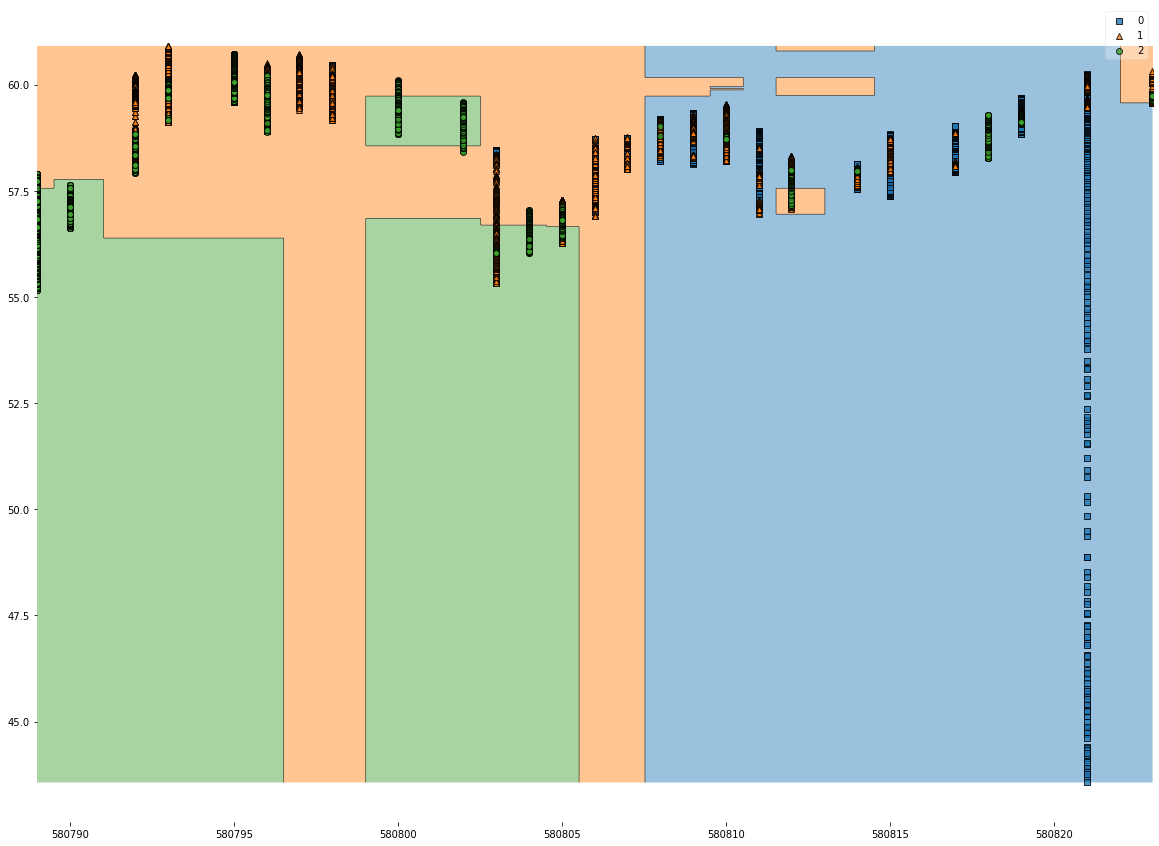

In [63]:
k = ['Partija_ANO_PDS', 'Tochka_rosy_v_SF1_MP3']
plt.figure(figsize=(20, 15))
fig = plot_decision_regions(X=data[k].to_numpy(),
                            y=y_clf[data[k].index].to_numpy(),
                            clf=RandomForestClassifier(n_estimators=100, max_depth=4).fit(X=data[k], y=y_clf), zoom_factor=10.)

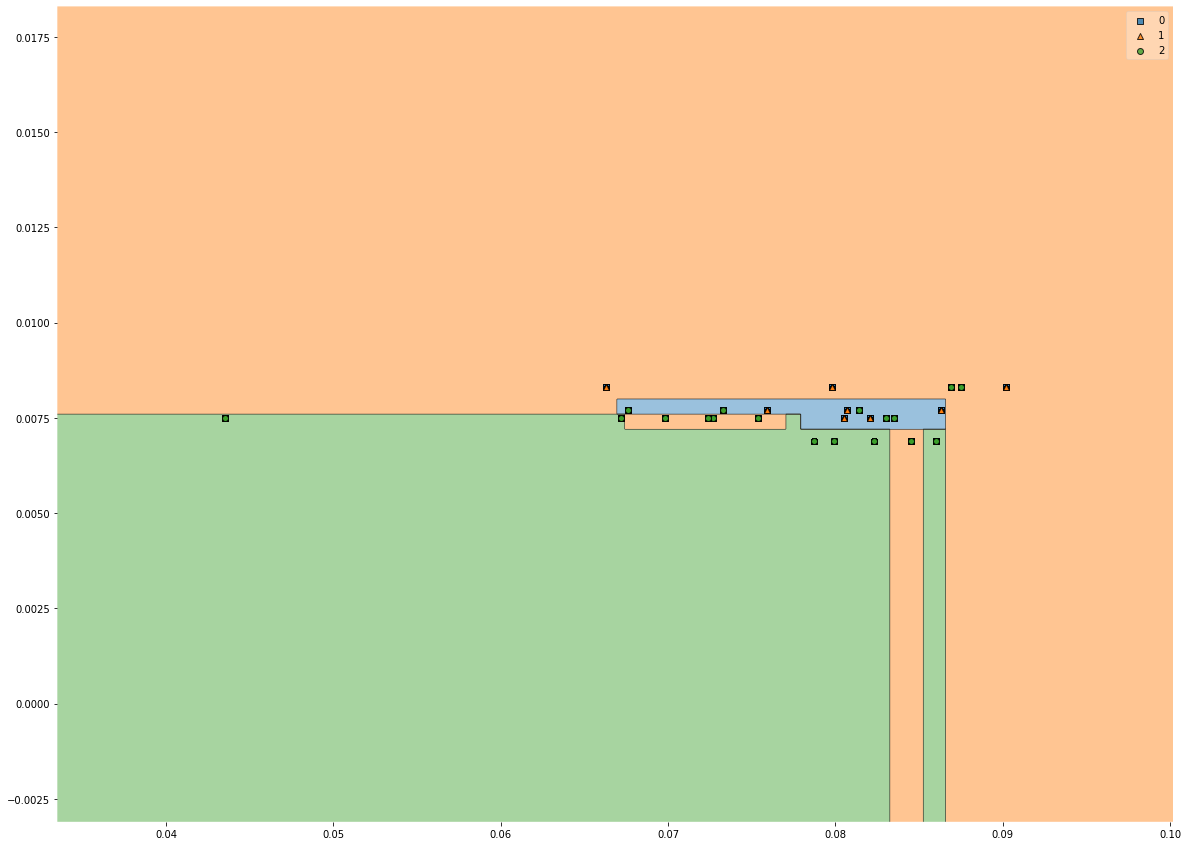

In [62]:
plt.figure(figsize=(20, 15))
fig = plot_decision_regions(X=data[k].to_numpy(),
                            y=y_clf[data[k].index].to_numpy(),
                            clf=RandomForestClassifier(n_estimators=100, max_depth=4).fit(X=data[k], y=y_clf), zoom_factor=100.)

In [98]:
estimator_rf_learned = cross_validate(estimator=estimator_rf, 
               X=data.drop(columns=['R17sr']),
               y=y_clf,
               cv=StratifiedKFold(n_splits=10, shuffle=True),
               scoring=['accuracy', 'f1_macro', 'f1_micro'], 
              return_train_score=False, 
              return_estimator=True)

In [92]:
estimator_rf_learned = cross_validate(estimator=estimator_rf, 
               X=data[['Pozitsija_VTO']],
               y=y_clf,
               cv=StratifiedKFold(n_splits=10, shuffle=True),
               scoring=['accuracy', 'f1_macro', 'f1_micro'], 
              return_train_score=False, 
              return_estimator=True)

/Users/rvtsukanov/utils/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/rvtsukanov/utils/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/rvtsukanov/utils/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/rvtsukanov/utils/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', ave

In [93]:
estimator_rf_learned

{'fit_time': array([0.46616197, 0.4535439 , 0.49965787, 0.43641186, 0.47525311,
        0.47785497, 0.45671988, 0.49157882, 0.490345  , 0.47579718]),
 'score_time': array([0.06707311, 0.06733298, 0.06247425, 0.06849623, 0.06356597,
        0.07417488, 0.06680489, 0.06301403, 0.06455016, 0.06346798]),
 'estimator': (RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                         max_depth=None, max_features='auto', max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0, warm_start=False),
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                         max_depth=None, max_features='auto', max_leaf_nodes=None,
                  

In [133]:
top3 = [feat for feat, _ in sorted(zip(data.columns, estimator_rf_learned['estimator'][0].feature_importances_), reverse=True, key=lambda x: x[1])[:3]]

cross_validate(estimator=estimator_rf, 
               X=data[set(data.columns).difference(top3)],
               y=y_clf,
               cv=StratifiedKFold(n_splits=10, shuffle=True),
               scoring=['accuracy', 'f1_macro'], 
              )

{'fit_time': array([2.93919802, 2.78335738, 2.81666303, 2.95349669, 3.02511406,
        3.00197601, 3.09790492, 2.92923021, 3.06371212, 2.90050507]),
 'score_time': array([0.11044002, 0.11240864, 0.107934  , 0.11027193, 0.11309862,
        0.11206794, 0.10993719, 0.11536503, 0.12646484, 0.11906505]),
 'test_accuracy': array([0.89074418, 0.88765203, 0.89363018, 0.88494845, 0.89092784,
        0.89072165, 0.89649485, 0.88927835, 0.88804124, 0.88948454]),
 'test_f1_macro': array([0.88621988, 0.88485323, 0.89095817, 0.87990448, 0.886597  ,
        0.88572972, 0.89286838, 0.88553823, 0.88298024, 0.88630241])}

In [137]:
top3 = [feat for feat, _ in sorted(zip(data.columns, estimator_rf_learned['estimator'][0].feature_importances_), reverse=True, key=lambda x: x[1])[:3]]

cross_validate(estimator=estimator_rf, 
               X=data[set(data.columns).difference(top3)],
               y=y_clf,
               cv=StratifiedKFold(n_splits=10, shuffle=True),
               scoring=['accuracy', 'f1_macro'], 
              )

{'fit_time': array([17.32113099, 17.343117  , 18.18300009, 17.82484579, 17.66460586,
        18.15554094, 18.0466032 , 17.86680412, 17.7850492 , 18.54379797]),
 'score_time': array([0.12041402, 0.14094806, 0.15876698, 0.13363194, 0.137995  ,
        0.14906693, 0.13085675, 0.13337398, 0.13486171, 0.14911819]),
 'test_accuracy': array([0.94186766, 0.94434137, 0.94331066, 0.94783505, 0.94804124,
        0.94329897, 0.93979381, 0.9414433 , 0.94226804, 0.94391753]),
 'test_f1_macro': array([0.94503564, 0.94970872, 0.94508155, 0.9528825 , 0.95217667,
        0.94839084, 0.94335734, 0.94487114, 0.94569482, 0.94745939])}

In [138]:
estimator_rf_learned = cross_validate(estimator=RandomForestClassifier(n_estimators=100), 
               X=data[set(data.columns).difference(top3)],
               y=y_clf,
               cv=StratifiedKFold(n_splits=10, shuffle=True),
               scoring=['accuracy', 'f1_macro'],
              return_train_score=False, 
              return_estimator=True)

In [139]:
top3

['Pozitsija_VTO', 'Znachenie_CO2_v_SF1_MP3', 'O2srednee']

In [140]:
top3_2 = [feat for feat, _ in sorted(zip(data.columns, estimator_rf_learned['estimator'][0].feature_importances_), reverse=True, key=lambda x: x[1])[:3]]

In [141]:
top3_2

['decarb_len', 'Temperatura_v_HEF_zona_2', 'Temperatura_v_RTF_zona_5']

In [146]:
estimator_rf_learned = cross_validate(estimator=RandomForestClassifier(n_estimators=100), 
               X=data[set(data.columns).difference(top3_2)],
               y=y_clf,
               cv=StratifiedKFold(n_splits=10, shuffle=True),
               scoring=['accuracy', 'f1_macro'],
              return_train_score=False, 
              return_estimator=True)

In [144]:
estimator_rf_learned['estimator'][0]

{'fit_time': array([3.81870985, 3.70732808, 3.64240289, 3.7704649 , 3.89294267,
        3.7406559 , 3.69575429, 3.69797397, 3.74914002, 3.75965118]),
 'score_time': array([0.18063498, 0.15156507, 0.1495142 , 0.16880918, 0.16266012,
        0.16863203, 0.16859293, 0.16205692, 0.15034986, 0.15758586]),
 'test_accuracy': array([0.9138322 , 0.90538033, 0.90847248, 0.91835052, 0.91443299,
        0.91175258, 0.91876289, 0.91773196, 0.91690722, 0.91319588]),
 'test_f1_macro': array([0.90425406, 0.89418702, 0.89501114, 0.90754802, 0.90725862,
        0.90102024, 0.90999821, 0.90826583, 0.90805625, 0.90233262])}

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [164]:
Xt, Xts, yt, yts = train_test_split(data, y_clf, shuffle=True)

ValueError: Found input variables with inconsistent numbers of samples: [48503, 3]

In [157]:
estimator_rf_learned = cross_validate(estimator=RandomForestClassifier(n_estimators=100), 
               X=Xt,
               y=yt,
               cv=StratifiedKFold(n_splits=10, shuffle=True),
               scoring=['accuracy', 'f1_macro'],
              return_train_score=False, 
              return_estimator=True)

In [163]:
f1_score(estimator_rf_learned['estimator'][0].predict(Xts), yts, average='macro')

0.9417009471896747

In [165]:
sorted(zip(data.columns, estimator_rf_learned['estimator'][0].feature_importances_), reverse=True, key=lambda x: x[1])[:20]

[('Partija_ANO_PDS', 0.03351109454701743),
 ('Tochka_rosy_v_SF1_MP3', 0.026794063243788503),
 ('Tochka_rosy_v_SF1_MP2', 0.02428795540673828),
 ('O2k', 0.020175232902127194),
 ('Tochka_rosy_v_RTF', 0.019805007861501987),
 ('Tochka_rosy_v_HEF_MP1', 0.019541811618986077),
 ('R17sr', 0.018926976757961057),
 ('O2n', 0.018263417926114408),
 ('O2srednee', 0.01739925398117608),
 ('Temperatura_polosy_na_levoj_motalke_prohod_3', 0.015624238789101066),
 ('Soderzhanie_H2_v_HEF_MP1', 0.015372246272177457),
 ('norm_len', 0.015311816253156158),
 ('Azot', 0.015123848577848382),
 ('decarb_len', 0.014456639006820144),
 ('Dlina,_m', 0.013938361182040851),
 ('cold2_len', 0.013803501713092716),
 ('cold3_len', 0.013716618731211518),
 ('cold1_len', 0.013358678651215507),
 ('Trend_temperatury_kontsa_prokatki_M12-02', 0.01333509080751297),
 ('Cn', 0.013254321229178053)]

### Stage: classifier (bimodal target)

In [167]:
cross_validate(estimator=lgb.LGBMClassifier(),
               X=data,
               y=y_bimod,
               cv=StratifiedKFold(n_splits=10, shuffle=True),
               scoring=['accuracy', 'f1_macro', 'f1_micro'])

{'fit_time': array([0.83072305, 0.84716201, 0.87314892, 0.90156627, 0.93111682,
        0.91479397, 0.98712087, 0.97472906, 0.89863491, 0.91605401]),
 'score_time': array([0.08022308, 0.07890415, 0.09052396, 0.08528686, 0.08743811,
        0.08857608, 0.09103417, 0.08798003, 0.08844686, 0.08766603]),
 'test_accuracy': array([0.99649629, 0.995671  , 0.99505155, 0.99587629, 0.99608247,
        0.99587629, 0.99690722, 0.9942268 , 0.99587629, 0.99649485]),
 'test_f1_macro': array([0.99564321, 0.99461031, 0.99385522, 0.99487935, 0.99512766,
        0.99487239, 0.99615516, 0.99284078, 0.99487703, 0.99564843]),
 'test_f1_micro': array([0.99649629, 0.995671  , 0.99505155, 0.99587629, 0.99608247,
        0.99587629, 0.99690722, 0.9942268 , 0.99587629, 0.99649485])}

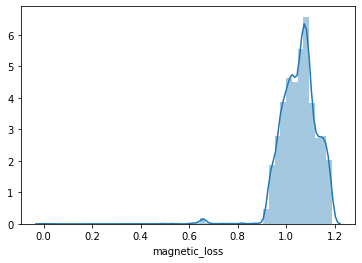

In [28]:
sns.distplot(y_reg[y_reg <= 1.19])

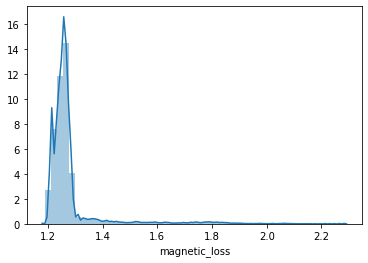

In [166]:
sns.distplot(y_reg[y_reg >= 1.19])

In [99]:
estimator=lgb.LGBMClassifier()

In [100]:
estimator.fit(X=data, y=y_bimod)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [103]:
sorted(zip(data.columns, estimator.feature_importances_), key=lambda x: -x[1])[:20]

[('Tolschina', 188),
 ('R17sr', 148),
 ('Trend_temperatury_kontsa_prokatki_M12-02', 112),
 ('Temperatura_v_SF3_zona_3', 95),
 ('Pozitsija_VTO', 83),
 ('Temperatura_v_SF1_zona_2', 75),
 ('Tochka_rosy_v_SF1_MP3', 75),
 ('Soderzhanie_H2_v_SF1_MP4', 75),
 ('Temperatura_v_HEF_zona_1', 69),
 ('Signal_s_datchika_mehanicheskih_svojstv_IMPOK-1B', 63),
 ('Massa', 62),
 ('Temperatura_polosy_na_levoj_motalke_prohod_5', 60),
 ('Trend_temperatury_za_5-j_kl__M12-02', 58),
 ('Temperatura_polosy_na_levoj_motalke_prohod_3', 56),
 ('Temperatura_v_SF3_zona_2', 53),
 ('Temperatura_v_HEF_zona_2', 51),
 ('hot_len', 50),
 ('Temperatura_polosy_v_zone_4', 48),
 ('cold2_len', 47),
 ('norm_len', 46)]

In [201]:
cross_validate(estimator=RandomForestClassifier(n_estimators=100),
               X=data[['R17sr']],
               y=y_bimod,
               cv=StratifiedKFold(n_splits=5, shuffle=True),
               scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])

{'fit_time': array([0.45889902, 0.42397594, 0.43640804, 0.4215219 , 0.43546605]),
 'score_time': array([0.13504291, 0.1299119 , 0.13346696, 0.13242316, 0.12920094]),
 'test_accuracy': array([0.90970934, 0.91578188, 0.91195876, 0.91123711, 0.90824742]),
 'test_f1_macro': array([0.88329038, 0.89088362, 0.88595239, 0.88587092, 0.88132616]),
 'test_precision_macro': array([0.90130941, 0.91044352, 0.90520539, 0.90116064, 0.89953762]),
 'test_recall_macro': array([0.86922138, 0.87577678, 0.87109012, 0.87353509, 0.86715707])}

In [202]:
data['Partija_ANO_PDS'].value_counts().shape

(27,)

In [6]:
cross_validate(estimator=RandomForestClassifier(n_estimators=100),
               X=data[['O2srednee', 'Massa']],
               y=data[['Partija_ANO_PDS']],
               cv=StratifiedKFold(n_splits=5, shuffle=True),
               scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])

/Users/rvtsukanov/utils/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rvtsukanov/utils/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rvtsukanov/utils/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rvtsukanov/utils/anaconda3/lib/python3.7/site-packages/sklearn/mod

{'fit_time': array([0.49758005, 0.48488593, 0.48037577, 0.49449182, 0.53274202]),
 'score_time': array([0.31585002, 0.28357029, 0.28320098, 0.31487632, 0.30653691]),
 'test_accuracy': array([1., 1., 1., 1., 1.]),
 'test_f1_macro': array([1., 1., 1., 1., 1.]),
 'test_precision_macro': array([1., 1., 1., 1., 1.]),
 'test_recall_macro': array([1., 1., 1., 1., 1.])}

In [61]:
def estimate_power_importance(data, 
                              target,
                              estimator_importance,
                              estimator_evaluation,
                              list_of_metrics_to_use=['accuracy', 'f1_macro'],
                              n_splits=5,
                              top_k_features=20):

    cross_val_dict = cross_validate(estimator=estimator_evaluation, 
                                    X=data,
                                    y=target,
                                    cv=StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42),
                                    scoring=list_of_metrics_to_use, 
                                    n_jobs=-1)
    scores = {key: cross_val_dict['test_' + key].mean() for key in list_of_metrics_to_use}
    
    
    whole_data_fitted_model = estimator_importance.fit(X=data, y=target)
    
    if not hasattr(estimator_importance, 'feature_importances_'):
        raise AttributeError(f'Cannot estimate importance of {estimator_importance} estimator')
        
    top_features = sorted(zip(data.columns, whole_data_fitted_model.feature_importances_), key=lambda x: -x[1])[:top_k_features]
    top_features_list = [val for val, _ in top_features]
    
    
    cross_val_dict_top_only = cross_validate(estimator=estimator_evaluation, 
                                    X=data[top_features_list],
                                    y=target,
                                    cv=StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42),
                                    scoring=list_of_metrics_to_use, 
                                    n_jobs=-1)
    scores_top_only = {key: cross_val_dict_top_only['test_' + key].mean() for key in list_of_metrics_to_use}
    
    
    
    cross_val_dict_top_omitted = cross_validate(estimator=estimator_evaluation, 
                                    X=data.drop(columns=top_features_list),
                                    y=target,
                                    cv=StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42),
                                    scoring=list_of_metrics_to_use, 
                                    n_jobs=-1)
    scores_top_omitted = {key: cross_val_dict_top_omitted['test_' + key].mean() for key in list_of_metrics_to_use}
    

    scores_df = pd.DataFrame([scores, scores_top_only, scores_top_omitted],
                              index=['original', 'top_only', 'top_omitted'])
    scores_df = scores_df.join(scores_df.apply(lambda x: pd.Series(data=x.iloc[0] - x), axis=0), rsuffix='_diff')
    scores_df['num_top_features'] = top_k_features
    
    
    return (scores, scores_top_only, scores_top_omitted), scores_df, top_features

In [62]:
from tqdm import tqdm_notebook

In [94]:
scores, scores_df, top_features = estimate_power_importance(data=data, target=y_bimod, 
                          estimator_importance=RandomForestClassifier(n_estimators=100, random_state=42),
                          estimator_evaluation=RandomForestClassifier(n_estimators=100, random_state=42))

In [144]:
rfr = RandomForestClassifier(random_state=42)

In [151]:
dfs=[]
for top_k in tqdm_notebook(range(1, 20)):
    dfs.append(estimate_power_importance(data=data, target=y_bimod, 
                          estimator_importance=RandomForestClassifier(n_estimators=100, random_state=42),
                          estimator_evaluation=RandomForestClassifier(n_estimators=100, random_state=42),
                                         top_k_features=top_k))
    print(dfs[-1][-1])
    print('---------')

[('Partija_ANO_PDS', 0.09821453176919855)]
---------
[('Partija_ANO_PDS', 0.09821453176919855), ('Tochka_rosy_v_HEF_MP1', 0.08598985767524125)]
---------
[('Partija_ANO_PDS', 0.09821453176919855), ('Tochka_rosy_v_HEF_MP1', 0.08598985767524125), ('Trend_temperatury_kontsa_prokatki_M12-02', 0.06778005328454864)]
---------
[('Partija_ANO_PDS', 0.09821453176919855), ('Tochka_rosy_v_HEF_MP1', 0.08598985767524125), ('Trend_temperatury_kontsa_prokatki_M12-02', 0.06778005328454864), ('Trend_temperatury_za_5-j_kl__M12-02', 0.036036702644442926)]
---------
[('Partija_ANO_PDS', 0.09821453176919855), ('Tochka_rosy_v_HEF_MP1', 0.08598985767524125), ('Trend_temperatury_kontsa_prokatki_M12-02', 0.06778005328454864), ('Trend_temperatury_za_5-j_kl__M12-02', 0.036036702644442926), ('Nk', 0.031878668690164993)]
---------
[('Partija_ANO_PDS', 0.09821453176919855), ('Tochka_rosy_v_HEF_MP1', 0.08598985767524125), ('Trend_temperatury_kontsa_prokatki_M12-02', 0.06778005328454864), ('Trend_temperatury_za_5-j_k

In [152]:
f1s = []
for i in range(1, 19):
    f1s.append(dfs[i][1])

In [12]:
f1s = []
for i in range(1, 19):
    f1s.append(dfs[i][1])

import matplotlib.pyplot as plt
%matplotlib inline

type_estimation = ['original', 'top_only', 'top_omitted']

plt.title('Top20')

plt.plot(pd.concat(f1s)[['f1_macro', 'num_top_features']].loc[type_estimation[0]]['num_top_features'], 
         pd.concat(f1s)[['f1_macro', 'num_top_features']].loc[type_estimation[0]]['f1_macro'], label=type_estimation[0])

plt.plot(pd.concat(f1s)[['f1_macro', 'num_top_features']].loc[type_estimation[1]]['num_top_features'], 
         pd.concat(f1s)[['f1_macro', 'num_top_features']].loc[type_estimation[1]]['f1_macro'], label=type_estimation[1])

plt.plot(pd.concat(f1s)[['f1_macro', 'num_top_features']].loc[type_estimation[2]]['num_top_features'], 
         pd.concat(f1s)[['f1_macro', 'num_top_features']].loc[type_estimation[2]]['f1_macro'], label=type_estimation[2])

plt.legend()

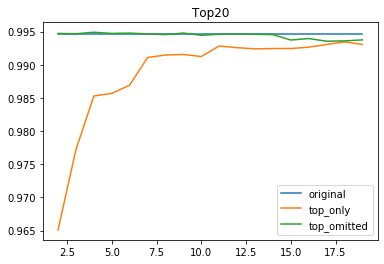

In [153]:
type_estimation = ['original', 'top_only', 'top_omitted']

plt.title('Top20')

plt.plot(pd.concat(f1s)[['f1_macro', 'num_top_features']].loc[type_estimation[0]]['num_top_features'], 
         pd.concat(f1s)[['f1_macro', 'num_top_features']].loc[type_estimation[0]]['f1_macro'], label=type_estimation[0])

plt.plot(pd.concat(f1s)[['f1_macro', 'num_top_features']].loc[type_estimation[1]]['num_top_features'], 
         pd.concat(f1s)[['f1_macro', 'num_top_features']].loc[type_estimation[1]]['f1_macro'], label=type_estimation[1])

plt.plot(pd.concat(f1s)[['f1_macro', 'num_top_features']].loc[type_estimation[2]]['num_top_features'], 
         pd.concat(f1s)[['f1_macro', 'num_top_features']].loc[type_estimation[2]]['f1_macro'], label=type_estimation[2])

plt.legend()

In [158]:
names = []
for i in range(0, 19):
    names.append(dfs[i][2])
    
for name_set in names:
    for name, score in name_set:
        print(name)
    print('---')

In [159]:
for name_set in names:
    for name, score in name_set:
        print(name)
    print('---')

Partija_ANO_PDS
---
Partija_ANO_PDS
Tochka_rosy_v_HEF_MP1
---
Partija_ANO_PDS
Tochka_rosy_v_HEF_MP1
Trend_temperatury_kontsa_prokatki_M12-02
---
Partija_ANO_PDS
Tochka_rosy_v_HEF_MP1
Trend_temperatury_kontsa_prokatki_M12-02
Trend_temperatury_za_5-j_kl__M12-02
---
Partija_ANO_PDS
Tochka_rosy_v_HEF_MP1
Trend_temperatury_kontsa_prokatki_M12-02
Trend_temperatury_za_5-j_kl__M12-02
Nk
---
Partija_ANO_PDS
Tochka_rosy_v_HEF_MP1
Trend_temperatury_kontsa_prokatki_M12-02
Trend_temperatury_za_5-j_kl__M12-02
Nk
Tolschina
---
Partija_ANO_PDS
Tochka_rosy_v_HEF_MP1
Trend_temperatury_kontsa_prokatki_M12-02
Trend_temperatury_za_5-j_kl__M12-02
Nk
Tolschina
Znachenie_CO_v_SF1_MP4
---
Partija_ANO_PDS
Tochka_rosy_v_HEF_MP1
Trend_temperatury_kontsa_prokatki_M12-02
Trend_temperatury_za_5-j_kl__M12-02
Nk
Tolschina
Znachenie_CO_v_SF1_MP4
R17sr
---
Partija_ANO_PDS
Tochka_rosy_v_HEF_MP1
Trend_temperatury_kontsa_prokatki_M12-02
Trend_temperatury_za_5-j_kl__M12-02
Nk
Tolschina
Znachenie_CO_v_SF1_MP4
R17sr
Ssrednee


In [62]:
df = pd.DataFrame(scores, index=['original', 'top_only', 'top_omitted'])

In [69]:
df.join(df.apply(lambda x: pd.Series(data=x.iloc[0] - x), axis=0), rsuffix='_diff')

,accuracy,f1_macro,accuracy_diff,f1_macro_diff
original,0.995691,0.994646,0.000000,0.000000
top_only,0.995567,0.994493,0.000124,0.000154
top_omitted,0.994887,0.993648,0.000804,0.000998


In [51]:
df

,accuracy,f1_macro
0,0.995691,0.994646
1,0.995567,0.994493
2,0.994887,0.993648


In [164]:
cross_validate(estimator=RandomForestClassifier(n_estimators=100, max_depth=7),
               X=data[['Partija_ANO_PDS', 'Tochka_rosy_v_HEF_MP1']],
               y=y_bimod,
               cv=StratifiedKFold(n_splits=5, shuffle=True),
               scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'], n_jobs=-1)

{'fit_time': array([1.29779387, 1.38977718, 1.43694997, 1.37486911, 1.34008121]),
 'score_time': array([0.20164108, 0.22621489, 0.22893095, 0.22782278, 0.20800781]),
 'test_accuracy': array([0.97278912, 0.97041542, 0.97268041, 0.97195876, 0.97298969]),
 'test_f1_macro': array([0.96595052, 0.96277933, 0.96573549, 0.9648181 , 0.96619018]),
 'test_precision_macro': array([0.96925169, 0.96870391, 0.97014029, 0.9693908 , 0.96960967]),
 'test_recall_macro': array([0.96278665, 0.95727954, 0.96157022, 0.96050336, 0.96291753])}

In [8]:
cross_validate(estimator=RandomForestClassifier(n_estimators=100, max_depth=4),
               X=data[['Partija_ANO_PDS', 'Tochka_rosy_v_HEF_MP1']],
               y=y_bimod,
               cv=StratifiedKFold(n_splits=5, shuffle=True),
               scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'], n_jobs=-1)

{'fit_time': array([0.85130811, 0.83811688, 0.95480895, 0.96267891, 0.92689204]),
 'score_time': array([0.16840577, 0.16674924, 0.1705029 , 0.17223501, 0.17042112]),
 'test_accuracy': array([0.93898165, 0.92567777, 0.93979381, 0.93175258, 0.93773196]),
 'test_f1_macro': array([0.9235404 , 0.90867329, 0.92496621, 0.91602368, 0.92343153]),
 'test_precision_macro': array([0.92717468, 0.904247  , 0.92614156, 0.91204846, 0.91913348]),
 'test_recall_macro': array([0.9200928 , 0.91345505, 0.92381137, 0.92027429, 0.92804581])}

In [ ]:
['O2srednee', 'Massa']

In [167]:
y_bimod

0        1
1        1
2        1
3        1
4        1
        ..
48498    0
48499    0
48500    0
48501    0
48502    0
Name: magnetic_loss, Length: 48503, dtype: category
Categories (2, int64): [0 < 1]

In [52]:
from mlxtend.plotting import plot_decision_regions

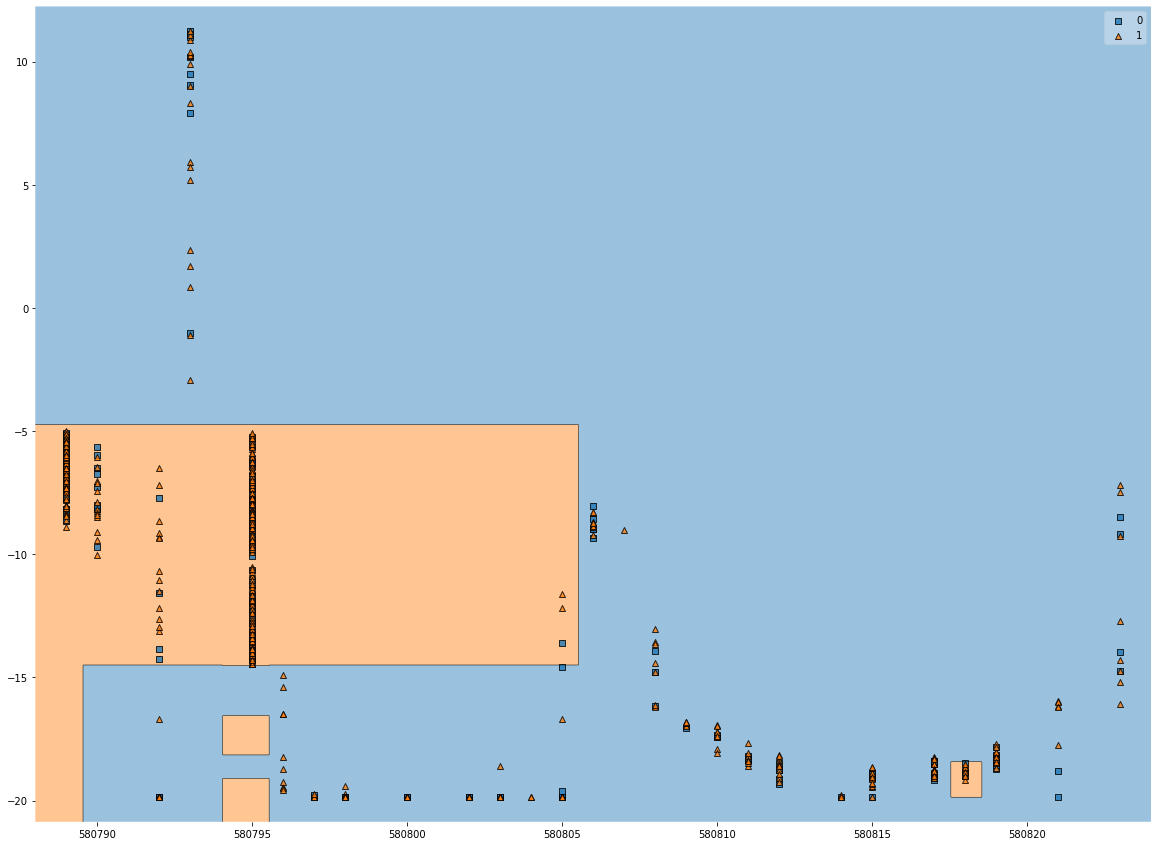

In [13]:
plt.figure(figsize=(20, 15))
fig = plot_decision_regions(X=data[['Partija_ANO_PDS', 'Tochka_rosy_v_HEF_MP1']].sample(n=1000).to_numpy(),
                            y=y_bimod[data[['Partija_ANO_PDS', 'Tochka_rosy_v_HEF_MP1']].sample(n=1000).index].to_numpy(),
                            clf=RandomForestClassifier(n_estimators=100, max_depth=4).fit(X=data[['Partija_ANO_PDS', 'Tochka_rosy_v_HEF_MP1']], y=y_bimod))

In [25]:
print(list(data.columns).index('O2srednee'))
list(data.columns).index('Massa')

92


96

ValueError: Column(s) [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 93 94 95 97 98] need to be accounted for in either feature_index or filler_feature_values

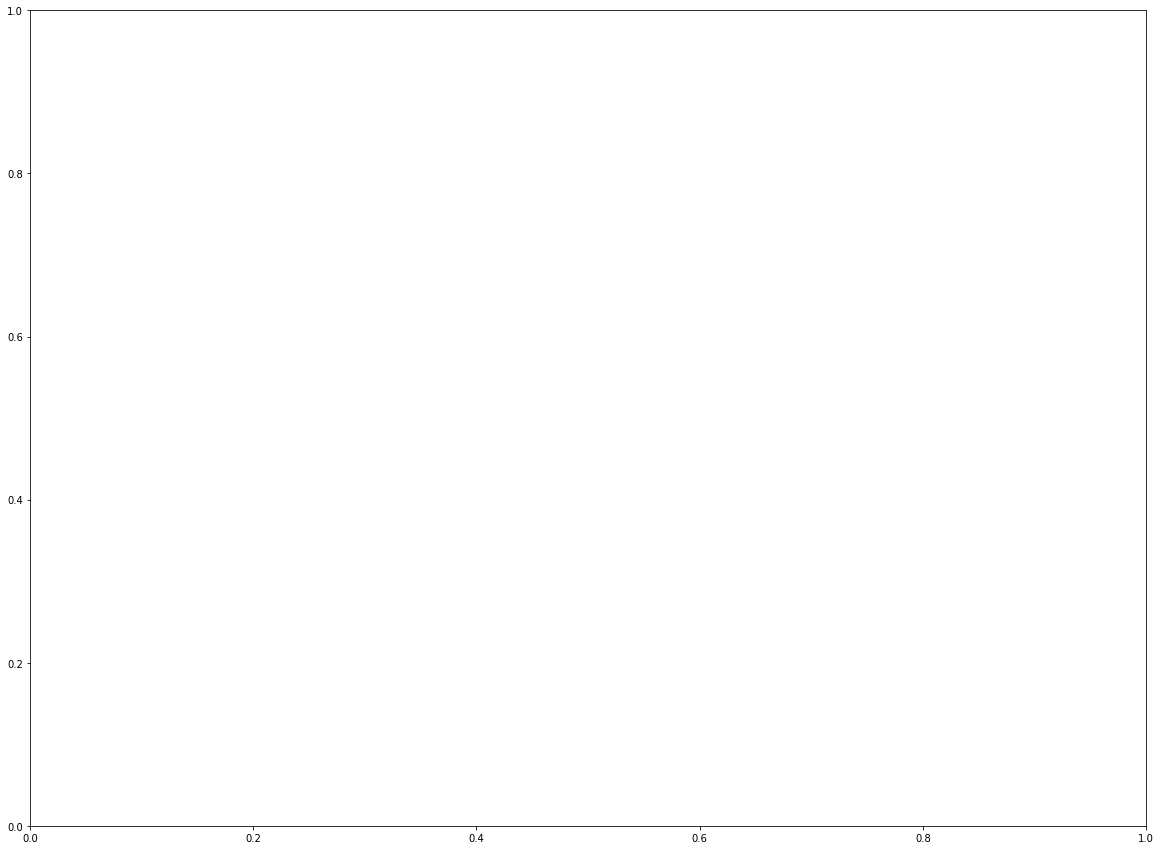

In [26]:
plt.figure(figsize=(20, 15))
fig = plot_decision_regions(X=data.to_numpy(),
                            y=y_bimod.to_numpy(),
                            clf=RandomForestClassifier(n_estimators=100, max_depth=3)\
                            .fit(X=data, y=y_bimod), filler_feature_values=[92, 96])

In [28]:
clf = RandomForestClassifier(n_estimators=100, max_depth=4)

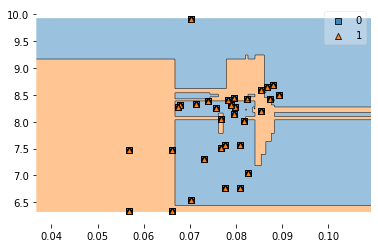

In [53]:
fig = plot_decision_regions(X=data[['O2srednee', 'Massa']].sample(n=42000).to_numpy(),
                            y=y_bimod[data[['O2srednee', 'Massa']].sample(n=42000).index].to_numpy(),
                            clf=RandomForestClassifier(n_estimators=100).fit(X=data[['O2srednee', 'Massa']], y=y_bimod,), zoom_factor=50.)

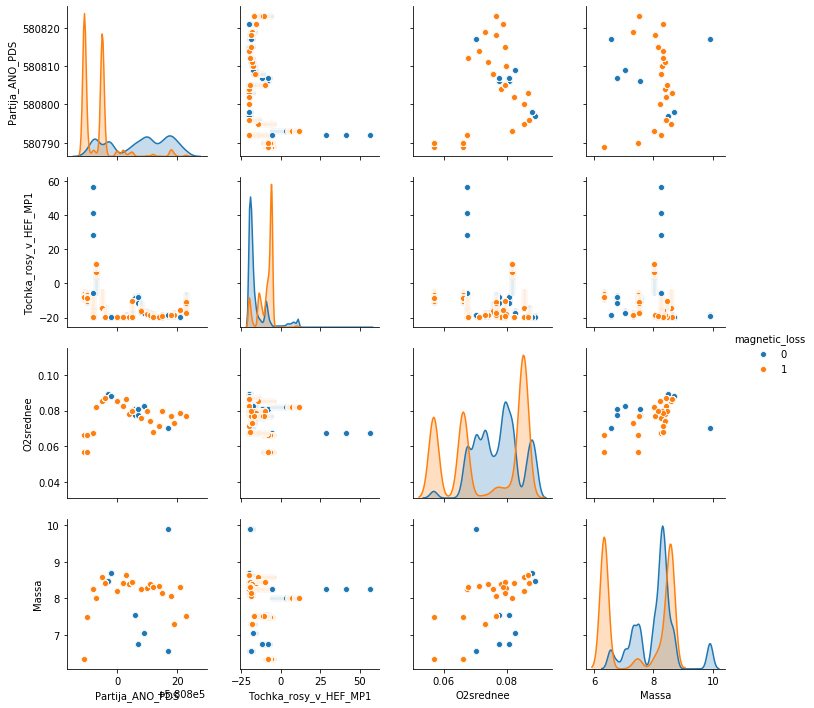

In [174]:
sns.pairplot(data=pd.concat([data, y_bimod], axis=1),
             vars=['Partija_ANO_PDS', 'Tochka_rosy_v_HEF_MP1', 'O2srednee', 'Massa'], hue='magnetic_loss')

In [ ]:
cross_validate(estimator=RandomForestClassifier(n_estimators=100),
               X=data[['O2srednee', 'Massa']],
               y=y_bimod,
               cv=StratifiedKFold(n_splits=5, shuffle=True),
               scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])

In [237]:
cross_validate(estimator=RandomForestClassifier(n_estimators=100),
               X=data[['O2srednee', 'Massa']],
               y=y_bimod,
               cv=StratifiedKFold(n_splits=5, shuffle=True),
               scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])

{'fit_time': array([0.49416709, 0.51075697, 0.54719377, 0.49957204, 0.46693587]),
 'score_time': array([0.1579392 , 0.15514112, 0.15915632, 0.15418506, 0.14448118]),
 'test_accuracy': array([0.94052773, 0.94330481, 0.94690722, 0.94237113, 0.94701031]),
 'test_f1_macro': array([0.9268843 , 0.93014182, 0.93459189, 0.92894091, 0.9347117 ]),
 'test_precision_macro': array([0.92251093, 0.9265469 , 0.9309158 , 0.9256617 , 0.93107853]),
 'test_recall_macro': array([0.93158185, 0.9339486 , 0.93848666, 0.9323957 , 0.93855815])}

In [239]:
cross_validate(estimator=RandomForestClassifier(n_estimators=100),
               X=data[['Tolschina', 'R17sr']],
               y=y_bimod,
               cv=StratifiedKFold(n_splits=5, shuffle=True),
               scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])

{'fit_time': array([0.5600071 , 0.55875206, 0.62185907, 0.5465579 , 0.53285003]),
 'score_time': array([0.18446898, 0.20637798, 0.1775701 , 0.18091607, 0.1773119 ]),
 'test_accuracy': array([0.93856937, 0.93949077, 0.93680412, 0.93680412, 0.93536082]),
 'test_f1_macro': array([0.92318396, 0.92531852, 0.92139257, 0.92142824, 0.91972471]),
 'test_precision_macro': array([0.92587283, 0.92241669, 0.9217284 , 0.92157177, 0.91939353]),
 'test_recall_macro': array([0.92059947, 0.92835818, 0.92105846, 0.92128503, 0.9200576 ])}

In [217]:
pd.DataFrame(data.corr()['Partija_ANO_PDS']).T

,"Dlina,_m",Trend_temperatury_za_5-j_kl__M12-02,Trend_tolschiny_za_12-j_kl_,Trend_temperatury_kontsa_prokatki_M12-02,Trend_temperatury_smotki_M12-02,R17sr,Svojstva_VPS,hot_len,Temperatura_polosy_v_zone_4,Temperatura_polosy_v_zone_7,Temperatura_polosy_v_zone_4B__AN,Temperatura_polosy_v_zone_4C2_AN,norm_len,Temperatura_polosy_na_levoj_motalke_prohod_1,cold1_len,Temperatura_polosy_na_pravoj_motalke_prohod_2,cold2_len,Temperatura_polosy_na_levoj_motalke_prohod_3,cold3_len,Temperatura_polosy_na_pravoj_motalke_prohod_4,cold4_len,Temperatura_polosy_na_levoj_motalke_prohod_5,cold5_len,Skorost'_tehnologicheskoj_sektsii_NS_4,Temperatura_v_RTF_zona_1,Temperatura_v_RTF_zona_2,Temperatura_v_RTF_zona_3,Temperatura_v_RTF_zona_4,Temperatura_v_RTF_zona_5,Temperatura_v_SF1_zona_1,Temperatura_v_SF1_zona_2,Temperatura_v_SF1_zona_3,Temperatura_v_SF1_zona_4,Temperatura_v_SF1_zona_5,Temperatura_v_SF1_zona_6,Temperatura_v_SF1_zona_7,Temperatura_v_HEF_zona_1,Temperatura_v_HEF_zona_2,Temperatura_v_ATC1_zona_1,Temperatura_v_ATC1_zona_2,Temperatura_v_SF3_zona_1,Temperatura_v_SF3_zona_2,Temperatura_v_SF3_zona_3,Znachenie_CO_v_RTF,Znachenie_CO2_v_RTF,Tochka_rosy_v_RTF,Soderzhnanie_H2_v_RTF,Znachenie_CO_v_SF1_MP1,Znachenie_CO2_v_SF1_MP1,Soderzhanie_H2_v_SF1_MP1,Znachenie_CO_v_SF1_MP2,Znachenie_CO2_v_SF1_MP3,Tochka_rosy_v_SF1_MP2,Soderzhanie_H2_v_SF1_MP2,Znachenie_CO_v_SF1_MP3,Znachenie_CO2_v_SF1_MP2,Tochka_rosy_v_SF1_MP3,Soderzhanie_H2_v_SF1_MP3,Znachenie_CO_v_SF1_MP4,Znachenie_CO2_v_SF1_MP4,Soderzhanie_H2_v_SF1_MP4,Tochka_rosy_v_HEF_MP1,Soderzhanie_H2_v_HEF_MP1,Soderzhanie_NH3_v_SF3_MP1,Soderzhanie_H2_v_SF3_MP1,Soderzhanie_NH3_v_SF3_MP2,Soderzhanie_H2_v_SF3_MP2,Signal_s_datchika_mehanicheskih_svojstv_IMPOK-1B,decarb_len,Tolschina,magn_len,Uglerod,Marganets,Kremnij,Fosfor,Sera,Hrom,Nikel',Med',Aljuminij,Titan,Azot,Olovo,Cn,Ssrednee,Sk,Nn,Nsrednee,Nk,"dsr,_mkm",ZVO,O2n,O2srednee,O2k,Tolsch_,Shirina,Massa,Pozitsija_VTO,Partija_ANO_PDS
Partija_ANO_PDS,0.25302,0.410414,0.047512,0.340203,0.005396,0.478318,0.598786,0.256051,0.196128,0.273553,0.098159,0.138921,0.371901,0.012455,0.376974,0.162802,0.160472,0.134891,0.379644,0.293166,0.166176,0.029674,0.373274,0.419572,0.122165,0.073088,0.128211,-0.179037,-0.184629,-0.069365,-0.278494,-0.124777,-0.230157,0.044689,-0.104301,0.34569,-0.138692,-0.180316,0.042247,0.064468,0.039721,-0.020045,-0.047819,0.294176,0.394349,0.553942,-0.050067,0.135685,0.406725,-0.038958,-0.418597,0.287211,0.422132,0.026539,-0.634,0.309239,0.201365,0.110799,-0.677021,0.169496,-0.003186,-0.674589,-0.263958,-0.032107,-0.229058,0.395482,-0.016112,0.222449,0.370766,-0.294182,0.310992,0.395616,0.477101,0.462406,0.443716,-0.176194,-0.127825,3.870106e-12,3.870106e-12,0.11566,0.437512,-0.088177,0.18931,-0.440628,-0.537529,-0.59509,0.528024,0.660233,0.714111,-0.040558,0.311283,0.074762,0.324122,0.414982,-0.55923,-0.445204,0.422358,-0.287792,1.0


In [219]:
clf = RandomForestClassifier(n_estimators=100).fit(X=data.drop(columns=['Partija_ANO_PDS']), y=data[['Partija_ANO_PDS']])

/Users/rvtsukanov/utils/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


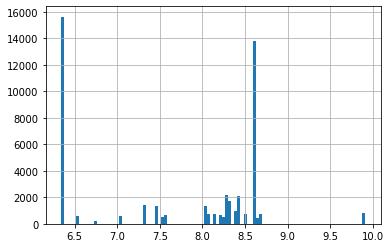

In [55]:
data['Massa'].hist(bins=100)

/Users/rvtsukanov/utils/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/rvtsukanov/utils/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


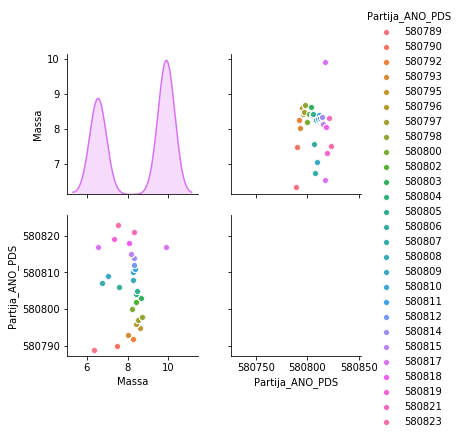

In [226]:
sns.pairplot(data=data[['Massa', 'Partija_ANO_PDS']], hue='Partija_ANO_PDS')

In [223]:
sorted(zip(data.drop(columns=['Partija_ANO_PDS']).columns, clf.feature_importances_), key=lambda x: -x[1])

[('Massa', 0.08266823579407748),
 ('O2srednee', 0.050554491961484406),
 ('O2k', 0.0472924477560967),
 ('Nsrednee', 0.04362778021332045),
 ('dsr,_mkm', 0.04209255180746895),
 ('R17sr', 0.03573062972414723),
 ('Cn', 0.03521829067022536),
 ('O2n', 0.03477588148339483),
 ('Znachenie_CO2_v_SF1_MP3', 0.03346906143370712),
 ('Sk', 0.032701273920765786),
 ('Nn', 0.03075201175928466),
 ('Nk', 0.029244409313092298),
 ('Znachenie_CO2_v_SF1_MP1', 0.02922834707997107),
 ('Tochka_rosy_v_RTF', 0.028234421673524034),
 ('Trend_temperatury_kontsa_prokatki_M12-02', 0.025907266283702192),
 ('Ssrednee', 0.024739540614976675),
 ('Azot', 0.02348472368266864),
 ('Tochka_rosy_v_HEF_MP1', 0.022463017382564038),
 ('Svojstva_VPS', 0.01807580314620402),
 ('Tochka_rosy_v_SF1_MP3', 0.017674654907923627),
 ('Soderzhnanie_H2_v_RTF', 0.017115788649383016),
 ('Kremnij', 0.01529669960743601),
 ('Soderzhanie_H2_v_SF1_MP2', 0.014883656004762522),
 ('Znachenie_CO2_v_SF1_MP2', 0.013429988780639451),
 ('Pozitsija_VTO', 0.0132

In [176]:
estimator=RandomForestClassifier(n_estimators=100)

In [181]:
estimator.fit( X=data, y=y_bimod)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [182]:
sorted(zip(data.columns, estimator.feature_importances_), key=lambda x: -x[1])[:20]

[('Partija_ANO_PDS', 0.10736755532107443),
 ('Trend_temperatury_kontsa_prokatki_M12-02', 0.07387496816059215),
 ('Tochka_rosy_v_HEF_MP1', 0.06094902932241904),
 ('R17sr', 0.04039119108477939),
 ('Tolschina', 0.03821985835260926),
 ('O2srednee', 0.036167331689306366),
 ('O2n', 0.032311817644839314),
 ('Trend_temperatury_za_5-j_kl__M12-02', 0.029538241235918018),
 ('Massa', 0.027146741549173313),
 ('Nk', 0.026171975819075998),
 ('Znachenie_CO_v_SF1_MP2', 0.022572158121777895),
 ('Znachenie_CO_v_SF1_MP4', 0.020545018530847944),
 ('Nsrednee', 0.017513783752943383),
 ('Pozitsija_VTO', 0.01738629239777078),
 ('Nn', 0.015249377959794627),
 ('Tochka_rosy_v_SF1_MP3', 0.014587298064759129),
 ('Kremnij', 0.014487392168654387),
 ('Ssrednee', 0.014455845820025758),
 ('Cn', 0.012768610232857212),
 ('Soderzhanie_H2_v_HEF_MP1', 0.012363398732738116)]

In [191]:
data[['Partija_ANO_PDS']].corrwith(y_bimod)

Partija_ANO_PDS   -0.646432
dtype: float64

### Stage: Regression

In [6]:
y_reg = target

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
estimator_reg_rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, )

In [9]:
from tqdm import tqdm_notebook

In [13]:
from sklearn.utils.multiclass import type_of_target 

In [19]:
type_of_target(y_bimod)

'binary'

In [10]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

In [20]:
def estimate_power_importance(data, 
                              target,
                              estimator_importance,
                              estimator_evaluation,
                              list_of_metrics_to_use=['accuracy', 'f1_macro'],
                              n_splits=5,
                              top_k_features=20):
    
    target_type = type_of_target(target)
    if target_type == 'continuous':
        cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    if target_type == 'multiclass' or target_type == 'binary':
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    cross_val_dict = cross_validate(estimator=estimator_evaluation, 
                                    X=data,
                                    y=target,
                                    cv=cv,
                                    scoring=list_of_metrics_to_use, 
                                    n_jobs=-1)
    scores = {key: cross_val_dict['test_' + key].mean() for key in list_of_metrics_to_use}
    
    
    whole_data_fitted_model = estimator_importance.fit(X=data, y=target)
    
    if not hasattr(estimator_importance, 'feature_importances_'):
        raise AttributeError(f'Cannot estimate importance of {estimator_importance} estimator')
        
    top_features = sorted(zip(data.columns, whole_data_fitted_model.feature_importances_), key=lambda x: -x[1])[:top_k_features]
    top_features_list = [val for val, _ in top_features]
    
    
    cross_val_dict_top_only = cross_validate(estimator=estimator_evaluation, 
                                    X=data[top_features_list],
                                    y=target,
                                    cv=cv,
                                    scoring=list_of_metrics_to_use, 
                                    n_jobs=-1)
    scores_top_only = {key: cross_val_dict_top_only['test_' + key].mean() for key in list_of_metrics_to_use}
    
    
    
    cross_val_dict_top_omitted = cross_validate(estimator=estimator_evaluation, 
                                    X=data.drop(columns=top_features_list),
                                    y=target,
                                    cv=cv,
                                    scoring=list_of_metrics_to_use, 
                                    n_jobs=-1)
    scores_top_omitted = {key: cross_val_dict_top_omitted['test_' + key].mean() for key in list_of_metrics_to_use}
    

    scores_df = pd.DataFrame([scores, scores_top_only, scores_top_omitted],
                              index=['original', 'top_only', 'top_omitted'])
    scores_df = scores_df.join(scores_df.apply(lambda x: pd.Series(data=x.iloc[0] - x), axis=0), rsuffix='_diff')
    scores_df['num_top_features'] = top_k_features
    
    
    return (scores, scores_top_only, scores_top_omitted), scores_df, top_features

In [21]:
dfs_reg = []
for top_k in tqdm_notebook(range(1, 20)):
    dfs_reg.append(estimate_power_importance(data=data, target=y_reg, 
                          estimator_importance=RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
                          estimator_evaluation=RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
                                         top_k_features=top_k, list_of_metrics_to_use=['r2']))
    print(dfs_reg[-1][-1])
    print('---------')

[('R17sr', 0.3083408103000686)]
---------
[('R17sr', 0.3083408103000686), ('Partija_ANO_PDS', 0.24798436168296809)]
---------
[('R17sr', 0.3083408103000686), ('Partija_ANO_PDS', 0.24798436168296809), ('Soderzhanie_H2_v_SF1_MP3', 0.07011466005162952)]
---------
[('R17sr', 0.3083408103000686), ('Partija_ANO_PDS', 0.24798436168296809), ('Soderzhanie_H2_v_SF1_MP3', 0.07011466005162952), ('Temperatura_polosy_na_levoj_motalke_prohod_5', 0.03243537283424433)]
---------
[('R17sr', 0.3083408103000686), ('Partija_ANO_PDS', 0.24798436168296809), ('Soderzhanie_H2_v_SF1_MP3', 0.07011466005162952), ('Temperatura_polosy_na_levoj_motalke_prohod_5', 0.03243537283424433), ('Znachenie_CO_v_SF1_MP3', 0.029045659758364997)]
---------
[('R17sr', 0.3083408103000686), ('Partija_ANO_PDS', 0.24798436168296809), ('Soderzhanie_H2_v_SF1_MP3', 0.07011466005162952), ('Temperatura_polosy_na_levoj_motalke_prohod_5', 0.03243537283424433), ('Znachenie_CO_v_SF1_MP3', 0.029045659758364997), ('Tolschina', 0.022591841404585

In [31]:
dfs_reg[7]

(({'r2': 0.9827159865872108},
  {'r2': 0.9532998360171769},
  {'r2': 0.9779609521330034}),
                    r2   r2_diff  num_top_features
 original     0.982716  0.000000                 8
 top_only     0.953300  0.029416                 8
 top_omitted  0.977961  0.004755                 8,
 [('R17sr', 0.3083408103000686),
  ('Partija_ANO_PDS', 0.24798436168296809),
  ('Soderzhanie_H2_v_SF1_MP3', 0.07011466005162952),
  ('Temperatura_polosy_na_levoj_motalke_prohod_5', 0.03243537283424433),
  ('Znachenie_CO_v_SF1_MP3', 0.029045659758364997),
  ('Tolschina', 0.022591841404585297),
  ('Cn', 0.021319399098621804),
  ("Skorost'_tehnologicheskoj_sektsii_NS_4", 0.016625031630329398)])

In [32]:
names = []
for i in range(0, 19):
    names.append(dfs_reg[i][2])
    
for name_set in names:
    for name, score in name_set:
        print(name)
    print('---')

R17sr
---
R17sr
Partija_ANO_PDS
---
R17sr
Partija_ANO_PDS
Soderzhanie_H2_v_SF1_MP3
---
R17sr
Partija_ANO_PDS
Soderzhanie_H2_v_SF1_MP3
Temperatura_polosy_na_levoj_motalke_prohod_5
---
R17sr
Partija_ANO_PDS
Soderzhanie_H2_v_SF1_MP3
Temperatura_polosy_na_levoj_motalke_prohod_5
Znachenie_CO_v_SF1_MP3
---
R17sr
Partija_ANO_PDS
Soderzhanie_H2_v_SF1_MP3
Temperatura_polosy_na_levoj_motalke_prohod_5
Znachenie_CO_v_SF1_MP3
Tolschina
---
R17sr
Partija_ANO_PDS
Soderzhanie_H2_v_SF1_MP3
Temperatura_polosy_na_levoj_motalke_prohod_5
Znachenie_CO_v_SF1_MP3
Tolschina
Cn
---
R17sr
Partija_ANO_PDS
Soderzhanie_H2_v_SF1_MP3
Temperatura_polosy_na_levoj_motalke_prohod_5
Znachenie_CO_v_SF1_MP3
Tolschina
Cn
Skorost'_tehnologicheskoj_sektsii_NS_4
---
R17sr
Partija_ANO_PDS
Soderzhanie_H2_v_SF1_MP3
Temperatura_polosy_na_levoj_motalke_prohod_5
Znachenie_CO_v_SF1_MP3
Tolschina
Cn
Skorost'_tehnologicheskoj_sektsii_NS_4
Soderzhanie_H2_v_SF3_MP1
---
R17sr
Partija_ANO_PDS
Soderzhanie_H2_v_SF1_MP3
Temperatura_polosy_na_l

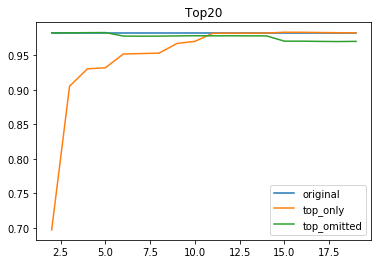

In [34]:
f1s = []
for i in range(1, 19):
    f1s.append(dfs_reg[i][1])

import matplotlib.pyplot as plt
%matplotlib inline

type_estimation = ['original', 'top_only', 'top_omitted']

plt.title('Top20')

plt.plot(pd.concat(f1s)[['r2', 'num_top_features']].loc[type_estimation[0]]['num_top_features'], 
         pd.concat(f1s)[['r2', 'num_top_features']].loc[type_estimation[0]]['r2'], label=type_estimation[0])

plt.plot(pd.concat(f1s)[['r2', 'num_top_features']].loc[type_estimation[1]]['num_top_features'], 
         pd.concat(f1s)[['r2', 'num_top_features']].loc[type_estimation[1]]['r2'], label=type_estimation[1])

plt.plot(pd.concat(f1s)[['r2', 'num_top_features']].loc[type_estimation[2]]['num_top_features'], 
         pd.concat(f1s)[['r2', 'num_top_features']].loc[type_estimation[2]]['r2'], label=type_estimation[2])

plt.legend()

In [36]:
names[-1]

[('R17sr', 0.3083408103000686),
 ('Partija_ANO_PDS', 0.24798436168296809),
 ('Soderzhanie_H2_v_SF1_MP3', 0.07011466005162952),
 ('Temperatura_polosy_na_levoj_motalke_prohod_5', 0.03243537283424433),
 ('Znachenie_CO_v_SF1_MP3', 0.029045659758364997),
 ('Tolschina', 0.022591841404585297),
 ('Cn', 0.021319399098621804),
 ("Skorost'_tehnologicheskoj_sektsii_NS_4", 0.016625031630329398),
 ('Soderzhanie_H2_v_SF3_MP1', 0.016342680756324154),
 ('Tochka_rosy_v_SF1_MP2', 0.014644879897299429),
 ('cold4_len', 0.013005920827699267),
 ('cold2_len', 0.012967543014247473),
 ('O2srednee', 0.010150761467317039),
 ('O2n', 0.009366141474789393),
 ('Pozitsija_VTO', 0.008224500013830294),
 ('Temperatura_v_SF3_zona_3', 0.006819178022672051),
 ('Soderzhnanie_H2_v_RTF', 0.006621978481974914),
 ('Temperatura_polosy_na_pravoj_motalke_prohod_2', 0.005928085286524141),
 ('Temperatura_v_SF1_zona_2', 0.005855920190865427)]

In [69]:
l = [{'accuracy': 0.7339710930892085, 'f1_macro': 0.7260089413609414},
 {'accuracy': 0.45598313348922825, 'f1_macro': 0.3600853319231038},
 {'accuracy': 0.7309013383750436, 'f1_macro': 0.7288228880024439}]

In [72]:
lpd = pd.DataFrame(l)

In [74]:
lpd['ntop'] = [2, 3, 4]

In [75]:
lpd

,accuracy,f1_macro,ntop
0,0.733971,0.726009,2
1,0.455983,0.360085,3
2,0.730901,0.728823,4


In [76]:
rfc = RandomForestClassifier()

In [79]:
rfc.__class__.__name__

'RandomForestClassifier'

In [81]:
om = pd.read_csv('./ommit_pd_06-05-2020--22-27-28--RandomForestClassifier--mag.csv')

In [83]:
on = pd.read_csv('./only_pd_06-05-2020--22-27-28--RandomForestClassifier--mag.csv')

In [84]:
on

,Unnamed: 0,accuracy,f1_macro,num_top
0,0,0.472915,0.381883,0
1,1,0.509021,0.414935,1
2,2,0.763057,0.755346,whole


In [85]:
om

,Unnamed: 0,accuracy,f1_macro,num_top
0,0,0.768082,0.762253,0
1,1,0.755042,0.743898,1
2,2,0.763057,0.755346,whole


In [89]:
j = on.join(om, lsuffix='l', rsuffix='r')

In [90]:
j

,Unnamed: 0l,accuracyl,f1_macrol,num_topl,Unnamed: 0r,accuracyr,f1_macror,num_topr
0,0,0.472915,0.381883,0,0,0.768082,0.762253,0
1,1,0.509021,0.414935,1,1,0.755042,0.743898,1
2,2,0.763057,0.755346,whole,2,0.763057,0.755346,whole


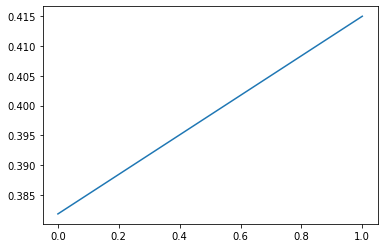

In [92]:
plt.plot(j['f1_macrol'][:-1])

In [93]:
multiclass_cols = []
binary_cols = []
cont_cols = []
other_cols = []

for col in data:
    if type_of_target(data[col]) == "multiclass":
        multiclass_cols.append(col)
    elif type_of_target(data[col]) == "binary":
        binary_cols.append(col)
    elif type_of_target(data[col]) == "continuous":
        cont_cols.append(col)
    else:
        print(type_of_target(data[col]), col)
        other_cols.append(col)

In [98]:
data[binary_cols]

,Shirina
0,1040
1,1040
2,1040
3,1040
4,1040
...,...
48498,1040
48499,1040
48500,1040
48501,1040


In [94]:
data[multiclass_cols]

,Svojstva_VPS,"dsr,_mkm",Pozitsija_VTO,Partija_ANO_PDS
0,2.0,26,3,580795
1,2.0,26,3,580795
2,2.0,26,3,580795
3,2.0,26,3,580795
4,2.0,26,3,580795
...,...,...,...,...
48498,1.0,23,2,580815
48499,1.0,23,2,580815
48500,1.0,23,2,580815
48501,1.0,23,2,580815
